# CRISP-DM Methodology

In this section we overview our selected method for engineering our solution. CRISP-DM stands for Cross-Industry Standard Process for Data Mining. It is an open standard guide that describes common approaches that are used by data mining experts. CRISP-DM includes descriptions of the typical phases of a project, including tasks details and provides an overview of the data mining lifecycle. The lifecycle model consists of six phases with arrows indicating the most important and frequent dependencies between phases. The sequence of the phases is not strict. In fact, most projects move back and forth between phases as necessary. It starts with business understanding, and then moves to data understanding, data preparation, modelling, evaluation, and deployment. The CRISP-DM model is flexible and can be customized easily.
## Buissness Understanding

    Tasks:

        1.Determine business objectives

        2.Assess situation

        3.Determine data mining goals

        4.Produce project plan

## Data Understanding
     Tasks:

    1.Collect data

    2.Describe data

    3.Explore data    

## Data Preparation
    Tasks
    1.Data selection

    2.Data preprocessing

    3.Feature engineering

    4.Dimensionality reduction

            Steps:

            Data cleaning

            Data integration

            Data sampling

            Data dimensionality reduction

            Data formatting

            Data transformation

            Scaling

            Aggregation

            Decomposition

## Data Modeling :

Modeling is the part of the Cross-Industry Standard Process for Data Mining (CRISP-DM) process model that i like best. Our data is already in good shape, and now we can search for useful patterns in our data.

    Tasks
    1. Select modeling technique Select technique

    2. Generate test design

    3. Build model

    4. Assess model

## Data Evaluation :
    Tasks

    1.Evaluate Result

    2.Review Process

    3.Determine next steps


#  Buissness Understanding
## Step 1: Import helpful libraries

In [1]:
#Load the librarys
import pandas as pd #To work with dataset
import numpy as np #Math library
import matplotlib.gridspec as gridspec
import seaborn as sns #Graph library that use matplot in background
import matplotlib.pyplot as plt #to plot some parameters in seaborn
import warnings
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.neighbors import KNeighborsClassifier
# Import StandardScaler from scikit-learn
from sklearn.preprocessing import StandardScaler,RobustScaler,MaxAbsScaler,MinMaxScaler,QuantileTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.manifold import TSNE
from sklearn.model_selection import GridSearchCV
# Import train_test_split()
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from datetime import datetime, date
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.model_selection import cross_val_score
import lightgbm as lgbm
from catboost import CatBoostRegressor
import  tensorflow as tf 
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
#import smogn
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
# For training random forest model
import lightgbm as lgb
from scipy import sparse
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans 
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression,f_classif
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import PolynomialFeatures
from itertools import combinations
#import smong 
from sklearn.linear_model import LinearRegression, RidgeCV
import category_encoders as ce
import warnings
warnings.filterwarnings('ignore')

In [2]:
## install pypi release
!pip install smogn

In [3]:
import smogn


## Step 2: Load the data

Next, we'll load the training and test data.

We set index_col=0 in the code cell below to use the id column to index the DataFrame. (If you're not sure how this works, try temporarily removing index_col=0 and see how it changes the result.)


In [4]:
# import lux
# Load the training data
train = pd.read_csv("../input/30-days-of-ml/train.csv")
test = pd.read_csv("../input/30-days-of-ml/test.csv")
# Preview the data
train.head()

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target
0,1,B,B,B,C,B,B,A,E,C,...,0.400361,0.160266,0.310921,0.389470,0.267559,0.237281,0.377873,0.322401,0.869850,8.113634
1,2,B,B,A,A,B,D,A,F,A,...,0.533087,0.558922,0.516294,0.594928,0.341439,0.906013,0.921701,0.261975,0.465083,8.481233
2,3,A,A,A,C,B,D,A,D,A,...,0.650609,0.375348,0.902567,0.555205,0.843531,0.748809,0.620126,0.541474,0.763846,8.364351
3,4,B,B,A,C,B,D,A,E,C,...,0.668980,0.239061,0.732948,0.679618,0.574844,0.346010,0.714610,0.540150,0.280682,8.049253
4,6,A,A,A,C,B,D,A,E,A,...,0.686964,0.420667,0.648182,0.684501,0.956692,1.000773,0.776742,0.625849,0.250823,7.972260


## EDA 

### Explore the data

    Null Data
    Categorical data
    Itrain.isnull().sum().valuess there Text data
    wich columns will we use
    IS there outliers that can destory our algo
    IS there diffrent range of data
    Curse of dimm...

####  Null Data 

In [5]:
train.isnull().sum().values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

### Duplicates 

In [6]:
train.duplicated(subset='id', keep='first').sum()

0

In [7]:
len(train)-len(train.drop_duplicates())

0

In [8]:
#Looking unique values
l=dict(train.nunique())
print(l)

{'id': 300000, 'cat0': 2, 'cat1': 2, 'cat2': 2, 'cat3': 4, 'cat4': 4, 'cat5': 4, 'cat6': 8, 'cat7': 8, 'cat8': 7, 'cat9': 15, 'cont0': 299632, 'cont1': 299727, 'cont2': 299738, 'cont3': 299407, 'cont4': 299702, 'cont5': 299760, 'cont6': 299737, 'cont7': 299710, 'cont8': 299713, 'cont9': 299684, 'cont10': 299616, 'cont11': 299727, 'cont12': 299657, 'cont13': 299705, 'target': 299613}


In [9]:
train.skew()

id        0.000153
cont0     0.236360
cont1     0.032677
cont2     0.082866
cont3     0.402795
cont4     0.776598
cont5     0.275822
cont6     0.507824
cont7     0.428809
cont8     0.540071
cont9     0.388129
cont10    0.056184
cont11    0.318717
cont12    0.101119
cont13    0.243352
target    0.176487
dtype: float64

In [10]:
# Check the structure of the data
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 26 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      300000 non-null  int64  
 1   cat0    300000 non-null  object 
 2   cat1    300000 non-null  object 
 3   cat2    300000 non-null  object 
 4   cat3    300000 non-null  object 
 5   cat4    300000 non-null  object 
 6   cat5    300000 non-null  object 
 7   cat6    300000 non-null  object 
 8   cat7    300000 non-null  object 
 9   cat8    300000 non-null  object 
 10  cat9    300000 non-null  object 
 11  cont0   300000 non-null  float64
 12  cont1   300000 non-null  float64
 13  cont2   300000 non-null  float64
 14  cont3   300000 non-null  float64
 15  cont4   300000 non-null  float64
 16  cont5   300000 non-null  float64
 17  cont6   300000 non-null  float64
 18  cont7   300000 non-null  float64
 19  cont8   300000 non-null  float64
 20  cont9   300000 non-null  float64
 21  cont10  30

###  Stat

In [11]:
train.describe()

,id,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target
count,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000
mean,250018.576947,0.527335,0.460926,0.490498,0.496689,0.491654,0.510526,0.467476,0.537119,0.498456,0.474872,0.474492,0.473216,0.494561,0.508273,8.241979
std,144450.150010,0.230599,0.214003,0.253346,0.219199,0.240074,0.228232,0.210331,0.218140,0.239920,0.218007,0.255949,0.222022,0.247292,0.222950,0.746555
min,1.000000,-0.118039,-0.069309,-0.056104,0.130676,0.255908,0.045915,-0.224689,0.203763,-0.260275,0.117896,0.048732,0.052608,-0.074208,0.151050,0.140329
25%,124772.500000,0.405965,0.310494,0.300604,0.329783,0.284188,0.354141,0.342873,0.355825,0.332486,0.306874,0.276017,0.308151,0.289074,0.300669,7.742071
50%,250002.500000,0.497053,0.427903,0.502462,0.465026,0.390470,0.488865,0.429383,0.504661,0.439151,0.434620,0.459975,0.433812,0.422887,0.472400,8.191373
75%,375226.500000,0.668060,0.615113,0.647512,0.664451,0.696599,0.669625,0.573383,0.703441,0.606056,0.614333,0.691579,0.642057,0.714502,0.758447,8.728634
max,499999.000000,1.058443,0.887253,1.034704,1.039560,1.055424,1.067649,1.111552,1.032837,1.040229,0.982922,1.055960,1.071444,0.975035,0.905992,10.411992


# Convert Dtypes : 

In [12]:
train[train.select_dtypes(['float64']).columns] = train[train.select_dtypes(['float64']).columns].apply(pd.to_numeric)
train[train.select_dtypes(['object']).columns] = train.select_dtypes(['object']).apply(lambda x: x.astype('category'))

### Visual Exploratory 

<function matplotlib.pyplot.show(close=None, block=None)>

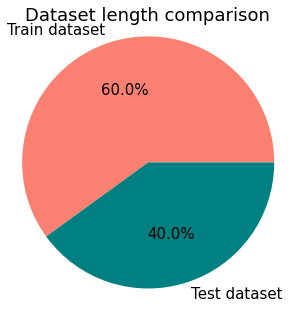

In [13]:
# Comparing the datasets length
fig, ax = plt.subplots(figsize=(5, 5))
pie = ax.pie([len(train), len(test)],
             labels=["Train dataset", "Test dataset"],
             colors=["salmon", "teal"],
             textprops={"fontsize": 15},
             autopct='%1.1f%%')
ax.axis("equal")
ax.set_title("Dataset length comparison", fontsize=18)
fig.set_facecolor('white')
plt.show

### Num/Cat Features 

In [14]:
cat_columns = train.drop(['id','target'], axis=1).select_dtypes(exclude=['int64','float64']).columns
num_columns = train.drop(['id','target'], axis=1).select_dtypes(include=['int64','float64']).columns

### Numerical features distribution
#### Histograms of numerical features

<Figure size 432x288 with 0 Axes>

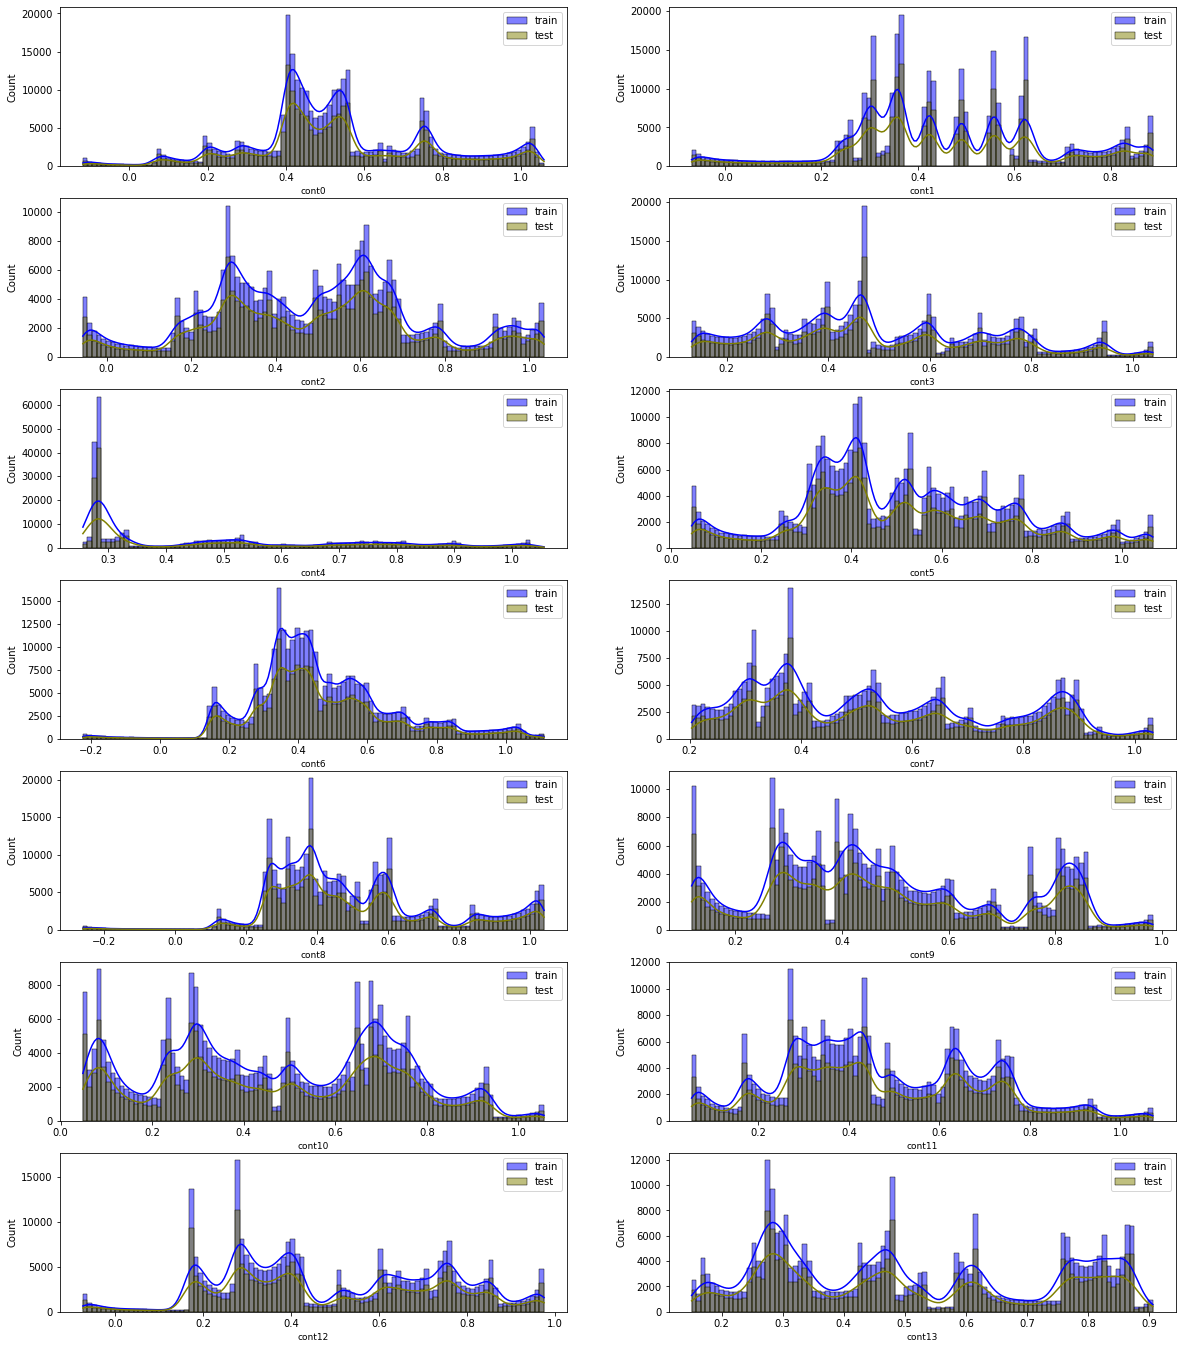

In [15]:
# Numerical features distribution 
i = 1
plt.figure()
fig, ax = plt.subplots(7, 2,figsize=(20, 24))
for feature in num_columns:
    plt.subplot(7, 2,i)
    sns.histplot(train[feature],color="blue", kde=True,bins=100, label='train')
    sns.histplot(test[feature],color="olive", kde=True,bins=100, label='test')
    plt.xlabel(feature, fontsize=9); plt.legend()
    i += 1
plt.show()

**Histograms of numerical data show a desperation of values with what look like multinomial distributions, also column cont1 seems to have some areas where the distribution becomes kinda discrete and again test numerical data seems to be similar to train numerical data.**
### Zooming on the correlation between numerical variables and target.

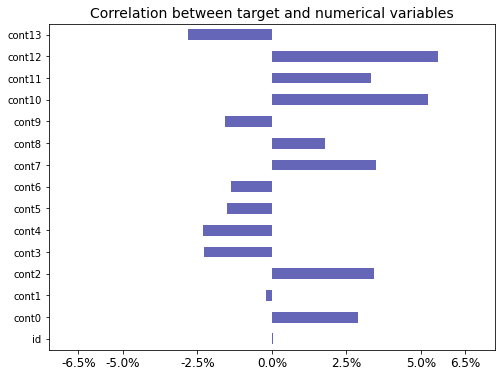

In [16]:
train.corr()['target'][:-1].plot.barh(figsize=(8,6),alpha=.6,color='darkblue')
plt.xlim(-.075,.075);
plt.xticks([-0.065, -0.05 , -0.025,  0.   ,  0.025,  0.05 ,  0.065],
           [str(100*i)+'%' for i in [-0.065, -0.05 , -0.025,  0.   ,  0.025,  0.05 ,  0.065]],fontsize=12)
plt.title('Correlation between target and numerical variables',fontsize=14);

It's clear tat there isn't any clear relation between numerical variables and target.

Now Exploring correlation between all numerical variables. First we get a correlation grid of all numercial variables and target


### Correlation 

In [17]:
train.corr().style.background_gradient(cmap='viridis')

,id,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target
id,1.000000,0.002445,0.001970,0.001552,0.000595,-0.002411,-0.001864,0.002295,-0.001246,-0.004349,-0.000328,0.000832,0.002284,-0.000480,-0.001694,0.000480
cont0,0.002445,1.000000,-0.009422,-0.296989,0.211333,-0.109776,0.392456,0.133995,0.294687,0.388510,0.394969,0.363413,0.255941,0.417872,0.023234,0.028819
cont1,0.001970,-0.009422,1.000000,-0.000627,-0.002233,-0.000285,0.003812,0.001321,0.013475,-0.021541,-0.002727,-0.001648,-0.017221,-0.006862,-0.010097,-0.002096
cont2,0.001552,-0.296989,-0.000627,1.000000,-0.180856,0.092780,-0.300140,-0.141724,-0.283989,-0.326456,-0.309118,-0.300273,-0.325023,-0.352009,-0.039815,0.034280
cont3,0.000595,0.211333,-0.002233,-0.180856,1.000000,-0.069934,0.201441,0.040133,0.172586,0.185221,0.194807,0.199525,0.140934,0.255117,0.037920,-0.022759
cont4,-0.002411,-0.109776,-0.000285,0.092780,-0.069934,1.000000,-0.148807,-0.044417,-0.095653,-0.122594,-0.123468,-0.132211,-0.115173,-0.151080,-0.012798,-0.023132
cont5,-0.001864,0.392456,0.003812,-0.300140,0.201441,-0.148807,1.000000,0.211800,0.329357,0.392057,0.411366,0.402053,0.308249,0.473964,0.053779,-0.015058
cont6,0.002295,0.133995,0.001321,-0.141724,0.040133,-0.044417,0.211800,1.000000,0.135333,0.117833,0.187303,0.178168,0.168731,0.171010,0.031183,-0.013807
cont7,-0.001246,0.294687,0.013475,-0.283989,0.172586,-0.095653,0.329357,0.135333,1.000000,0.332639,0.320239,0.283414,0.279405,0.363091,0.056958,0.035143
cont8,-0.004349,0.388510,-0.021541,-0.326456,0.185221,-0.122594,0.392057,0.117833,0.332639,1.000000,0.406517,0.341430,0.297121,0.434196,0.050163,0.017740


### Box plot of numerical columns

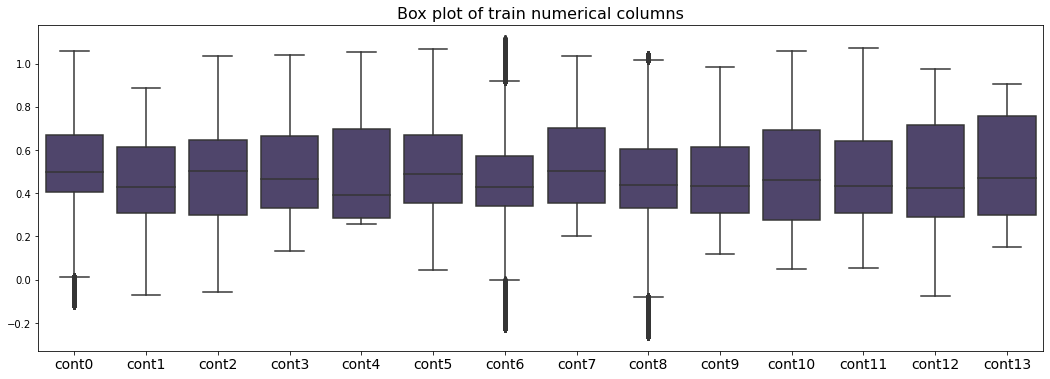

In [18]:
v0 = sns.color_palette(palette='viridis').as_hex()[0]
fig = plt.figure(figsize=(18,6))
sns.boxplot(data=train[num_columns], color=v0,saturation=.5);
plt.xticks(fontsize= 14)
plt.title('Box plot of train numerical columns', fontsize=16);


### Test data 

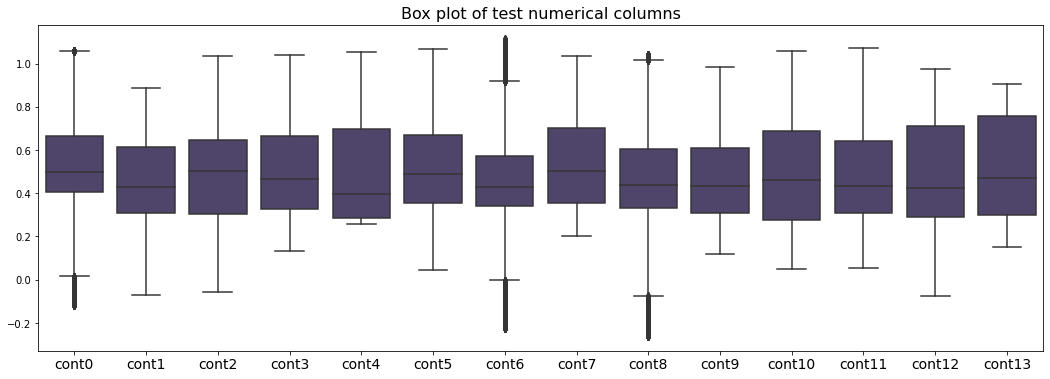

In [19]:
fig = plt.figure(figsize=(18,6))
sns.boxplot(data=test[num_columns], color=v0,saturation=.5);
plt.xticks(fontsize= 14)
plt.title('Box plot of test numerical columns', fontsize=16);

Numerical Data seems to be kinda normalized with few outliers appearing in the box plot Also test numerical data seems to looks like the train ones.

## Categorical features distribution

### Number of categorical unique values

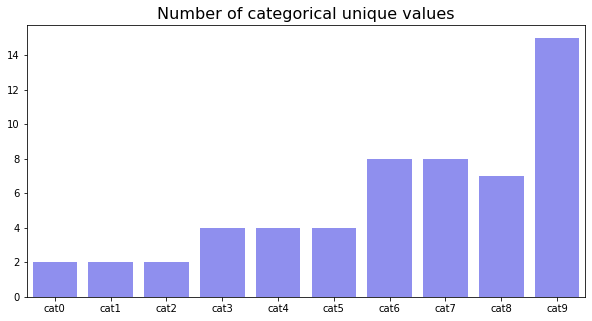

Most of columns seems to have few categorical unique values except cat9 column.

### Categorical features distribution

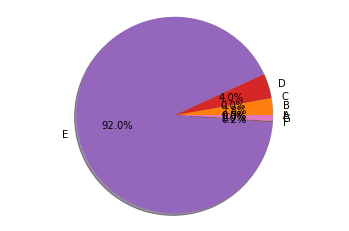

<Figure size 432x288 with 0 Axes>

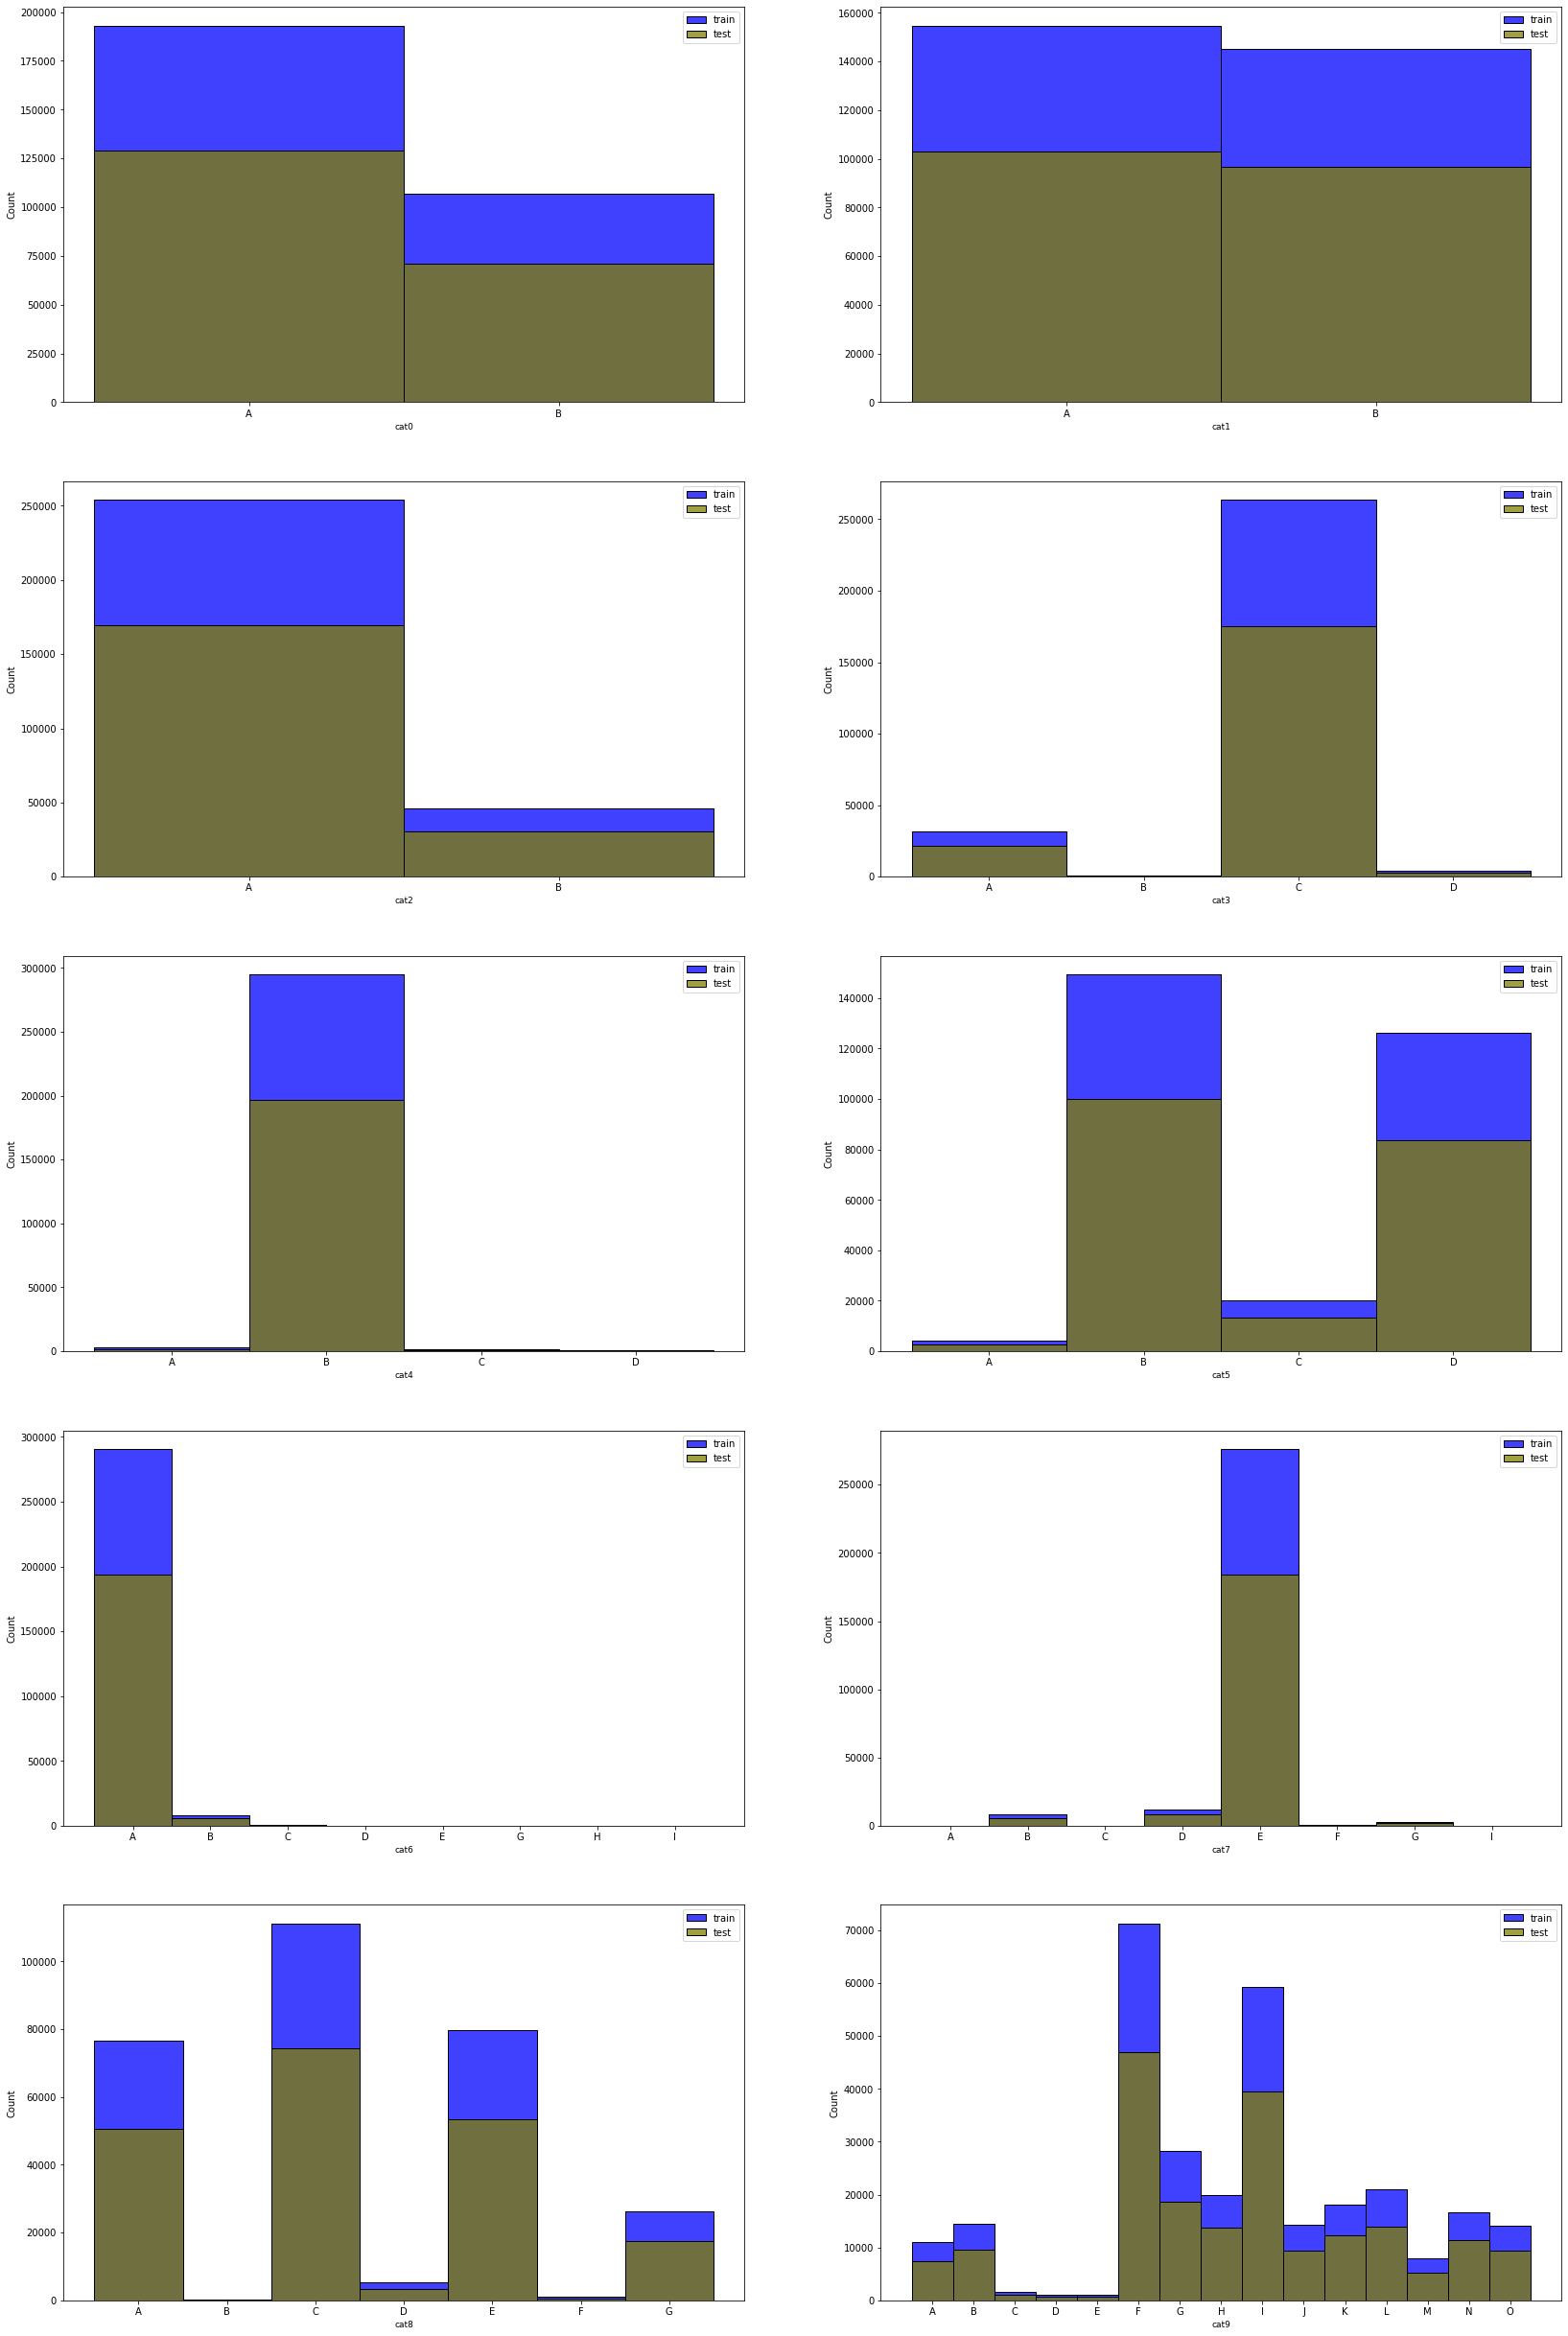

In [22]:
# Categorical features distribution 
i = 1
plt.figure()
fig, ax = plt.subplots(5, 2,figsize=(28, 44))
for feature in cat_columns:
    plt.subplot(5, 2,i)
    sns.histplot(train[feature],color="blue", label='train')
    sns.histplot(test[feature],color="olive", label='test')
    plt.xlabel(feature, fontsize=9); plt.legend()
    i += 1
plt.show()

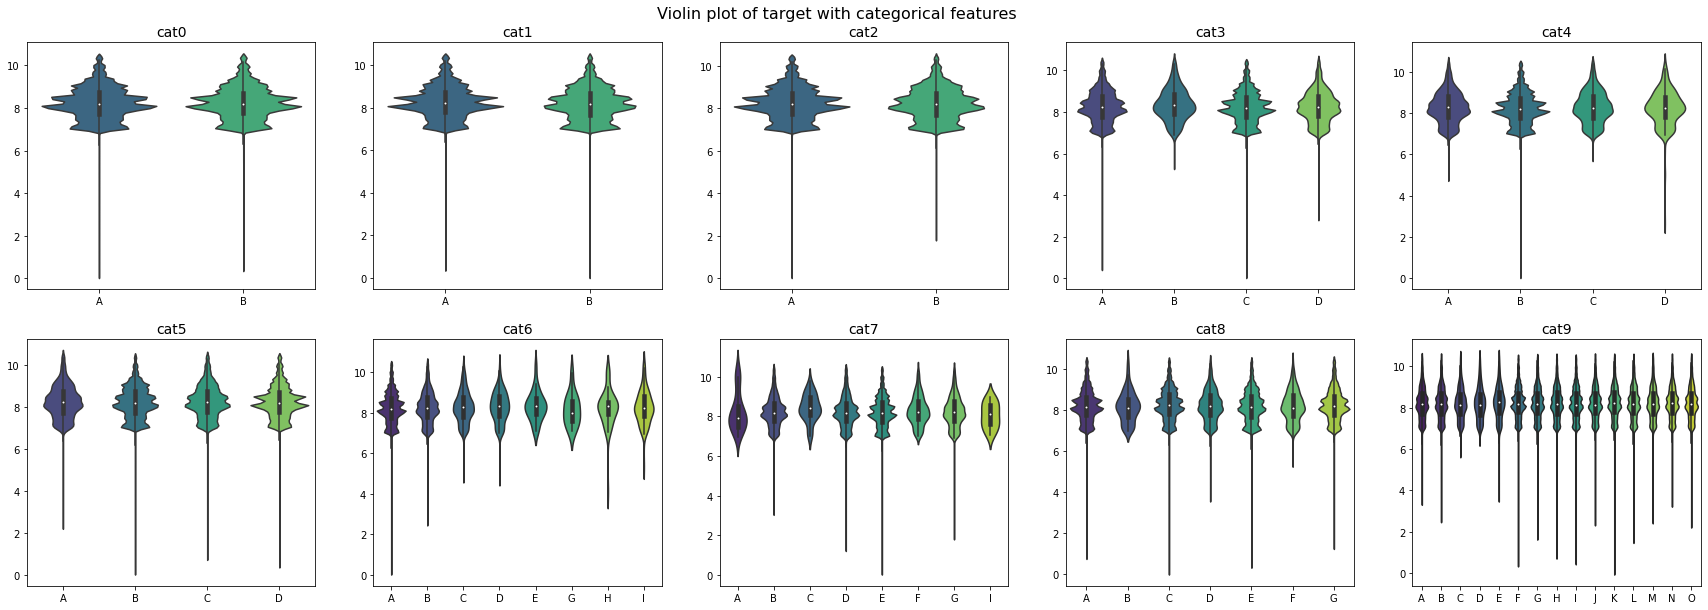

In [23]:
fig = plt.figure(figsize=(30,10))
grid =  gridspec.GridSpec(2,5,figure=fig,hspace=.2,wspace=.2)
n =0
for i in range(2):
    for j in range(5):
        ax = fig.add_subplot(grid[i, j])
        sns.violinplot(data = train, y = 'target', x = 'cat'+str(n),ax=ax, alpha =.7, fill=True,palette='viridis')
        ax.set_title('cat'+str(n),fontsize=14)
        ax.set_xlabel('')
        ax.set_ylabel('')
        n += 1
fig.suptitle('Violin plot of target with categorical features', fontsize=16,y=.93);

###  KDE plot of target with categorical features 

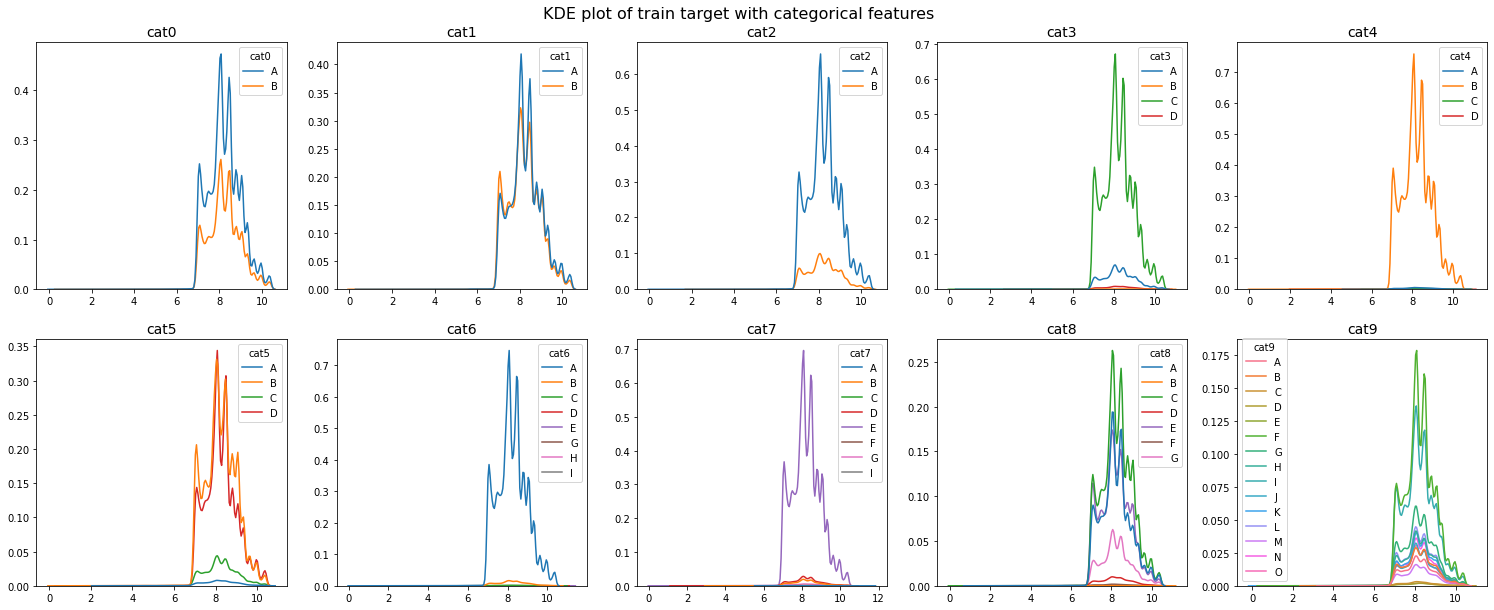

In [24]:
fig = plt.figure(figsize=(26,10))
grid =  gridspec.GridSpec(2,5,figure=fig,hspace=.2,wspace=.2)
n =0
for i in range(2):
    for j in range(5):
        ax = fig.add_subplot(grid[i, j])
        sns.kdeplot(data = train, x = 'target', hue = 'cat'+str(n),ax=ax, alpha =.7, fill=False)
        ax.set_title('cat'+str(n),fontsize=14)
        ax.set_xlabel('')
        ax.set_ylabel('')
        n += 1
fig.suptitle('KDE plot of train target with categorical features', fontsize=16,y=.93);

This plot kinda agrees with previous one but it looks like the KDE of some categorical values are pretty much flat compared to other value.

## Convert Dtypes :

In [25]:
train[train.select_dtypes(['float64']).columns] = train[train.select_dtypes(['float64']).columns].apply(pd.to_numeric)
train[train.select_dtypes(['object']).columns] = train.select_dtypes(['object']).apply(lambda x: x.astype('category'))

##  Target 
###  exploring target data main statistics

In [26]:
train['target'].describe()

count    300000.000000
mean          8.241979
std           0.746555
min           0.140329
25%           7.742071
50%           8.191373
75%           8.728634
max          10.411992
Name: target, dtype: float64

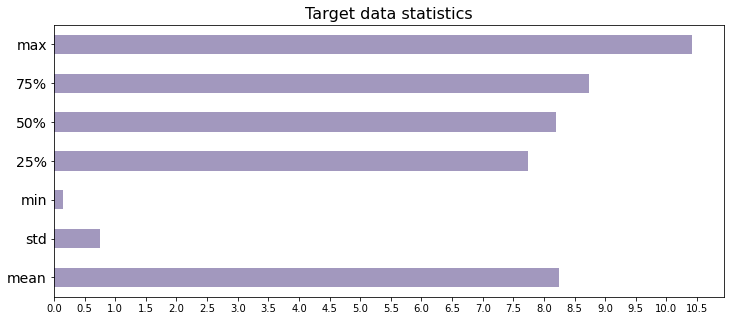

In [27]:
train['target'].describe().iloc[1:].plot.barh(color=v0,alpha=.5,figsize=(12,5))
plt.title('Target data statistics',fontsize=16)
plt.yticks(fontsize=14)
plt.xticks(np.arange(0,10.8,.5));

### Distribution of Target

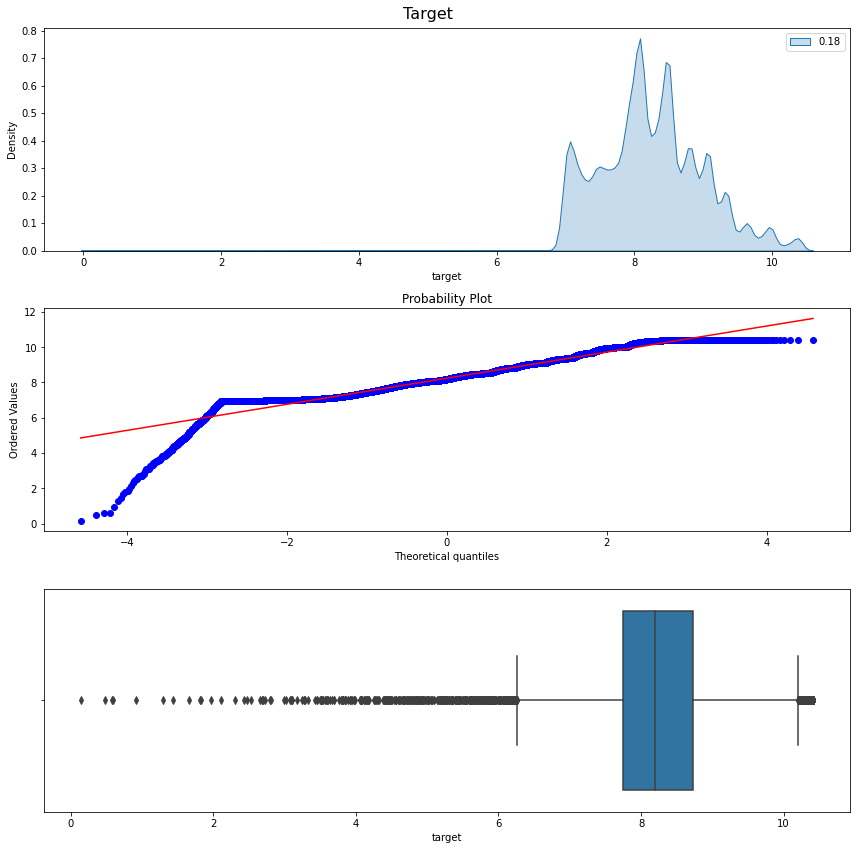

In [28]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy import stats
f, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 12))

f.suptitle('Target', fontsize=16)
g = sns.kdeplot(train['target'], shade=True, label="%.2f"%(train['target'].skew()), ax=axes[0])
g = g.legend(loc="best")
stats.probplot(train['target'], plot=axes[1])
sns.boxplot(x='target', data=train, orient='h', ax=axes[2]);
plt.tight_layout()
plt.show()

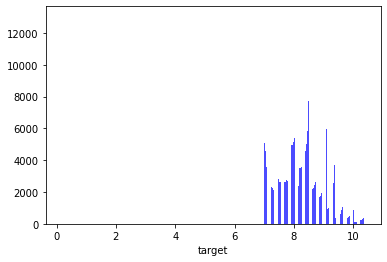

In [29]:
n, bins, patches = plt.hist(x=train['target'], bins='auto', color='blue',alpha=0.7, rwidth=0.5)
plt.xlabel("target")
plt.show()

### Box plot of target data with percentile of .1% and 99.9%

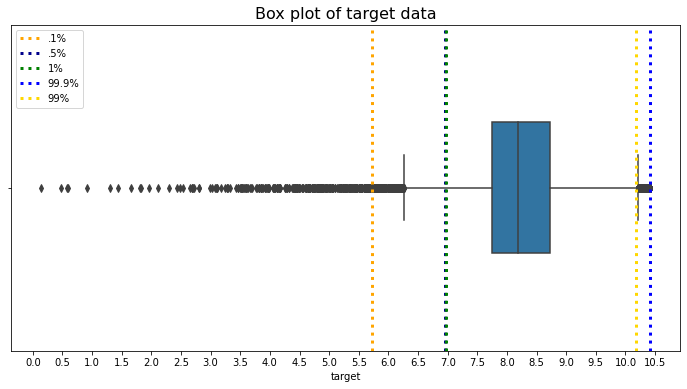

In [30]:
y=train['target']
plt.figure(figsize=(12,6))
sns.boxplot(x=y, width=.4);
plt.axvline(np.percentile(y,.1), label='.1%', c='orange', linestyle=':', linewidth=3)
plt.axvline(np.percentile(y,.5), label='.5%', c='darkblue', linestyle=':', linewidth=3)
plt.axvline(np.percentile(y,1), label='1%', c='green', linestyle=':', linewidth=3)
plt.axvline(np.percentile(y,99.9), label='99.9%', c='blue', linestyle=':', linewidth=3)
plt.axvline(np.percentile(y,99), label='99%', c='gold', linestyle=':', linewidth=3)
plt.legend()
plt.title('Box plot of target data', fontsize=16)
plt.xticks(np.arange(0,10.8,.5));

In [31]:
np.percentile(y,75)

8.728634343253574

In [32]:
np.percentile(y,100)

10.411991752210524

In [65]:
y= train['target']
factor = 1.2
qmin=y.quantile(0.2)
qmax=y.quantile(0.98)
q1 = y.quantile(0.25)
q3 = y.quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (factor * iqr)
upper_bound = q3 + (factor * iqr)
print(lower_bound)
print(upper_bound)

6.558195657350646
9.912509990109717


### Bin target 

In [34]:
bins = [0.1403287728456096,  6.26222674563661, 10.208478901823753,10.411991752210524]
# Bin labels
labels1 = [ 'MinorityOne ', 'Majority', 'MinorityTwo']
trainessai=train.copy()
# Bin the continuous variable ConvertedSalary using these boundaries
trainessai['target_binned'] = pd.cut(trainessai['target'], 
                                bins=bins,labels=labels1 )

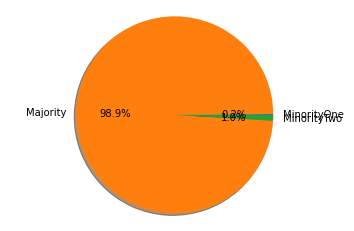

In [35]:
labels = trainessai['target_binned'].astype('category').cat.categories.tolist()
counts = trainessai['target_binned'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

###  Conculsion : 
Several real world prediction problems involve forecasting rare values of a target variable. When this variable is nominal we have a problem of class imbalance that was already studied thoroughly within machine learning. For regression tasks, where the target variable is continuous, few works exist addressing this type of problem. Still, important application areas involve forecasting rare extreme values of a continuous target variable. Namely, we propose to address such tasks by sampling approaches. These approaches change the distribution of the given training data set to decrease the problem of imbalance between the rare target cases and the most frequent ones. We present a modification of the well-known Smote algorithm that allows its use on these regression tasks



####  Data Centric approch : 
A Python implementation of Synthetic Minority Over-Sampling Technique for Regression with Gaussian Noise (SMOGN). Conducts the Synthetic Minority Over-Sampling Technique for Regression (SMOTER) with traditional interpolation, as well as with the introduction of Gaussian Noise (SMOTER-GN). Selects between the two over-sampling techniques by the KNN distances underlying a given observation. If the distance is close enough, SMOTER is applied. If too far away, SMOTER-GN is applied. Useful for prediction problems where regression is applicable, but the values in the interest of predicting are rare or uncommon. This can also serve as a useful alternative to log transforming a skewed response variable, especially if generating synthetic data is also of interest. 

## t-SNE visualization of high-dimensional data

t-SNE intuition t-SNE is super powerful, but do you know exactly when to use it? When you want to visually explore the patterns in a high dimensional dataset. press


In [36]:
m = TSNE(learning_rate=50)
df_numeric =trainessai.drop(['id','target'], axis=1).iloc[:1500,:]._get_numeric_data()
df_numeric=df_numeric.dropna()
# Fit and transform the t-SNE model on the numeric dataset
tsne_features = m.fit_transform(df_numeric)
%timeit 
print(tsne_features.shape)

(1500, 2)


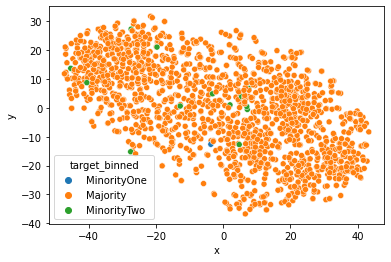

In [37]:
dataa=trainessai.drop(['id','target'], axis=1).iloc[:1500,:]
dataa['x']=tsne_features[:, 0]
dataa['y']=tsne_features[:, 1]
# Color the points according to Army Component
sns.scatterplot(x='x', y='y', hue='target_binned', data=dataa)
# Show the plot
plt.show()

**Target is really so disperssed**
## Kmeans 

/bin/bash: -c: line 0: syntax error near unexpected token `http://'
/bin/bash: -c: line 0: `[](http://)train1['cluster'] = train1['cluster'].astype('object')'


,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target,cluster
0,1,B,B,B,C,B,B,A,E,C,...,0.160266,0.310921,0.389470,0.267559,0.237281,0.377873,0.322401,0.869850,8.113634,2
1,2,B,B,A,A,B,D,A,F,A,...,0.558922,0.516294,0.594928,0.341439,0.906013,0.921701,0.261975,0.465083,8.481233,1
2,3,A,A,A,C,B,D,A,D,A,...,0.375348,0.902567,0.555205,0.843531,0.748809,0.620126,0.541474,0.763846,8.364351,4


In [41]:
# Create a series out of the Country column
cluster = train1.cluster

# Get the counts of each category
cluster_counts = cluster.value_counts()

# Print the count values for each category
print(cluster_counts)

1    68237
4    66000
0    64107
3    56933
2    44723
Name: cluster, dtype: int64


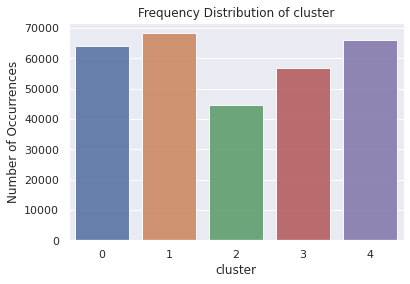

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")
sns.barplot(cluster_counts.index,cluster_counts.values, alpha=0.9)
plt.title('Frequency Distribution of cluster')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('cluster', fontsize=12)
plt.show()

### Crosstab

In [43]:
import seaborn as sns 
red = sns.light_palette("red", as_cmap=True)
cross_tab=pd.crosstab(train1['cluster'], train1['cat1'], margins = True)
H=cross_tab/cross_tab.loc["All"] # Divide by column totals
H.style.background_gradient(cmap=red)

cat1,A,B,All
cluster,,,
0,0.168669,0.261703,0.213690
1,0.256911,0.196045,0.227457
2,0.123573,0.176276,0.149077
3,0.147955,0.234378,0.189777
4,0.302892,0.131599,0.220000
All,1.000000,1.000000,1.000000


**Clustering seems like it wont add anything**


## Convert Dtype: 

In [44]:
train[train.select_dtypes(['float64']).columns] = train[train.select_dtypes(['float64']).columns].apply(pd.to_numeric)
train[train.select_dtypes(['object']).columns] = train.select_dtypes(['object']).apply(lambda x: x.astype('category'))

## Define the model features and target
### Extract X and y 

In [45]:
# Create arrays for the features and the response variable
y = train['target'].to_numpy()
X = train.drop(['id','target'], axis=1)

In [46]:
X.shape

(300000, 24)

## Create test and train groups

Now we’ve got our dataframe ready we can split it up into the train and test datasets for our model to use. We’ll use the Scikit-Learn train_test_split() function for this. By passing in the X dataframe of raw features, the y series containing the target, and the size of the test group (i.e. 0.1 for 10%), we get back the X_train, X_test, y_train and y_test data to use in the model.

In [47]:
# Split the dataset and labels into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)
print("{} rows in test set vs. {} in training set. {} Features.".format(X_test.shape[0], X_train.shape[0], X_test.shape[1]))

60000 rows in test set vs. 240000 in training set. 24 Features.


##   conduct smogn


In [48]:
trainmong =train.drop(['id'], axis=1).copy()

In [49]:
trainmong.columns

Index(['cat0', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8',
       'cat9', 'cont0', 'cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6',
       'cont7', 'cont8', 'cont9', 'cont10', 'cont11', 'cont12', 'cont13',
       'target'],
      dtype='object')

In [50]:
num_columns=['cont0', 'cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6', 'cont7',
       'cont8', 'cont9', 'cont10', 'cont11', 'cont12', 'cont13']
cat_columns=['cat0', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8',
       'cat9']
all_columns = (num_columns+cat_columns)
print(cat_columns)
print(num_columns)
print(all_columns)

['cat0', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8', 'cat9']
['cont0', 'cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6', 'cont7', 'cont8', 'cont9', 'cont10', 'cont11', 'cont12', 'cont13']
['cont0', 'cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6', 'cont7', 'cont8', 'cont9', 'cont10', 'cont11', 'cont12', 'cont13', 'cat0', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8', 'cat9']


In [51]:
# Cat Features  
OrdinalEncoder133= make_pipeline(
            SimpleImputer(strategy='most_frequent',add_indicator=True),
            ce.ordinal.OrdinalEncoder(),
              )
# Num Features 
PowerTransformer133  = make_pipeline( SimpleImputer(strategy='median',add_indicator=True),
                        RobustScaler()
)
OrdinalEncoder_PowerTransformer133 = make_column_transformer(
    ( OrdinalEncoder133 , cat_columns),
    #( PowerTransformer133, num_columns),
    ( 'passthrough' , ['target']+num_columns))
trainmongprocess= OrdinalEncoder_PowerTransformer133.fit_transform(trainmong)  
dffinal = pd.DataFrame(trainmongprocess, columns = trainmong.columns .tolist())

In [59]:
dffinal.head(2)

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.610706,0.400361,0.160266,0.310921,0.389470,0.267559,0.237281,0.377873,0.322401,0.869850
1,1.0,1.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,...,0.276853,0.533087,0.558922,0.516294,0.594928,0.341439,0.906013,0.921701,0.261975,0.465083


In [74]:
## specify phi relevance values
rg_mtrx = [
    [6.26222674563661,  1, 0],  ## over-sample ("minority")
    [10.208478901823753, 1, 0],  ## over-sample ("minority")
]
## conduct smogn
train_smogn = smogn.smoter(
    
    ## main arguments
    data = dffinal,           ## pandas dataframe
    y = 'target',             ## string ('header name')
    k = 3,                    ## positive integer (k < n)
    samp_method = 'extreme',  ## string ('balance' or 'extreme')
    under_samp = False,
    ## phi relevance arguments
    rel_thres = 0.80,         ## positive real number (0 < R < 1)
    rel_method = 'auto',      ## string ('auto' or 'manual')
    rel_xtrm_type = 'low',   ## string ('low' or 'both' or 'high')
    rel_coef = 2.5           ## positive real number (0 < R)
)

ValueError: redefine phi relevance function: all points are 1

In [ ]:
train_smogn.shape

In [ ]:
## plot y distribution 
seaborn.kdeplot(train['target'], label = "Original")
seaborn.kdeplot(train_smogn['target'], label = "Modified")

In [ ]:
!!kiki

##  What should we do for each colmun
### Separate features by dtype

Next we’ll separate the features in the dataframe by their datatype. There are a few different ways to achieve this. I’ve used the select_dtypes() function to obtain specific data types by passing in np.number to obtain the numeric data and exclude=['np.number'] to return the categorical data. Appending .columns to the end returns an Index list containing the column names. For the categorical features, we don’t want to include the target income column, so I’ve dropped that.
### Cat Features 

In [ ]:
# select non-numeric columns
cat_columns = train.drop(['id','target'], axis=1).select_dtypes(exclude=['int64','float64']).columns

### Num Features 

In [ ]:
# select the float columns
num_columns = train.drop(['id','target'], axis=1).select_dtypes(include=['int64','float64']).columns

In [ ]:
num_columns=['cont0', 'cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6', 'cont7',
       'cont8', 'cont9', 'cont10', 'cont11', 'cont12', 'cont13']
cat_columns=['cat0', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8',
       'cat9']
all_columns = (num_columns+cat_columns)
print(cat_columns)
print(num_columns)
print(all_columns)

## check that we have all column

In [ ]:
if set(all_columns) == set(train.drop(['id','target'], axis=1).columns):
    print('Ok')
else:
    # Let's see the difference 
    print('dans all_columns mais pas dans train  :', set(all_columns) - set(train.drop(['id','target'], axis=1).columns))
    print('dans X.columns   mais pas dans all_columns :', set(train.drop(['id','target'], axis=1).columns) - set(all_columns))

# Data Preparation
## Data preprocessing

Data preprocessing comes after you've cleaned up your data and after you've done some exploratory analysis to understand your dataset. Once you understand your dataset, you'll probably have some idea about how you want to model your data. Machine learning models in Python require numerical input, so if your dataset has categorical variables, you'll need to transform them. Think of data preprocessing as a prerequisite for modeling.

While this assumption of similar scales is necessary, it is rarely true in real world data. For this reason you need to rescale your data to ensure that it is on the same scale. There are many different approaches to doing this but we will discuss the two most commonly used approaches here, Min-Max scaling (sometimes referred to as **normalization**), and **standardization**.

Normalization,in normalization you linearly scale the entire column between 0 and 1, with 0 corresponding with the lowest value in the column, and 1 with the largest. When using scikit-learn (the most commonly used machine learning library in Python) you can use a MinMaxScaler to apply normalization. (It is called this as it scales your values between a minimum and maximum value.)
Normalization scales all points linearly between the upper and lower bound.

**Log Transformer**

Helps with skewness No predetermined range for scaled data Useful only on non-zero, non-negative data
The Log Transform is one of the most popular Transformation techniques out there. It is primarily used to convert a skewed distribution to a normal distribution/less-skewed distribution. In this transform, we take the log of the values in a column and use these values as the column instead.

Why does it work? It is because the log function is equipped to deal with large numbers. Here is an example-

log(10) = 1

log(100) = 2, and

log(10000) =4

Thus, the log operation had a dual role:

    Reducing the impact of too-low values
    Reducing the impact of too-high values.

A small caveat though – if our data has negative values or values ranging from 0 to 1, we cannot apply log transform directly – since the log of negative numbers and numbers between 0 and 1 is undefined, we would get error or NaN values in our data. In such cases, we can add a number to these values to make them all greater than 1. Then, we can apply the log transform.

**Min-Max Scaler**

Rescales to predetermined range [0–1] Doesn’t change distribution’s center (doesn’t correct skewness) Sensitive to outliers

**Max Abs Scaler**

Rescales to predetermined range [-1–1] Doesn’t change distribution’s center Sensitive to outliers

In simplest terms, the MaxAbs scaler takes the absolute maximum value of each column and divides each value in the column by the maximum value.

Thus, it first takes the absolute value of each value in the column and then takes the maximum value out of those. This operation scales the data between the range [-1, 1]

**Standard Scaler**

Shifts distribution’s mean to 0 & unit variance No predetermined range Best to use on data that is approximately normally distributed
For each feature, the Standard Scaler scales the values such that the mean is 0 and the standard deviation is 1(or the variance).
x_scaled = x – mean/std_dev

However, Standard Scaler assumes that the distribution of the variable is normal. Thus, in case, the variables are not normally distributed, we

    either choose a different scaler
    or first, convert the variables to a normal distribution and then apply this scaler


**Robust Scaler**

0 mean & unit variance Use of quartile ranges makes this less sensitive to (a few) outliers No predetermined range
If you have noticed in the scalers we used so far, each of them was using values like the mean, maximum and minimum values of the columns. All these values are sensitive to outliers. If there are too many outliers in the data, they will influence the mean and the max value or the min value. Thus, even if we scale this data using the above methods, we cannot guarantee a balanced data with a normal distribution.

The Robust Scaler, as the name suggests is not sensitive to outliers. This scaler-

    removes the median from the data
    scales the data by the InterQuartile Range(IQR)

Are you familiar with the Inter-Quartile Range? It is nothing but the difference between the first and third quartile of the variable. The interquartile range can be defined as-

    IQR = Q3 – Q1

Thus, the formula would be:

x_scaled = (x – Q1)/(Q3 – Q1)

**Power Transformer**

Helps correct skewness 0 mean & unit variance No predetermined range Yeo-Johnson or Box-Cox Box-Cox can only be used on non-negative data

I often use this feature transformation technique when I am building a linear model. To be more specific, I use it when I am dealing with heteroskedasticity. Like some other scalers we studied above, the Power Transformer also changes the distribution of the variable, as in, it makes it more Gaussian(normal). We are familiar with similar power transforms such as square root, and cube root transforms, and log transforms.

However, to use them, we need to first study the original distribution, and then make a choice. The Power Transformer actually automates this decision making by introducing a parameter called lambda. It decides on a generalized power transform by finding the best value of lambda using either the:

1. Box-Cox transform

2. The Yeo-Johnson transform

While I will not get into too much detail of how each of the above transforms works, it is helpful to know that Box-Cox works with only positive values, while Yeo-Johnson works with both positive and negative values

**Quantile Transformer Scaler**

One of the most interesting feature transformation techniques that I have used, the Quantile Transformer Scaler converts the variable distribution to a normal distribution. and scales it accordingly. Since it makes the variable normally distributed, it also deals with the outliers. Here are a few important points regarding the Quantile Transformer Scaler:

1. It computes the cumulative distribution function of the variable

2. It uses this cdf to map the values to a normal distribution

3. Maps the obtained values to the desired output distribution using the associated quantile function

A caveat to keep in mind though: Since this scaler changes the very distribution of the variables, linear relationships among variables may be destroyed by using this scaler. Thus, it is best to use this for non-linear data.

**Unit Vector Scaler/Normalizer**

Normalization is the process of scaling individual samples to have unit norm. The most interesting part is that unlike the other scalers which work on the individual column values, the Normalizer works on the rows! Each row of the dataframe with at least one non-zero component is rescaled independently of other samples so that its norm (l1, l2, or inf) equals one.

Just like MinMax Scaler, the Normalizer also converts the values between 0 and 1, and between -1 to 1 when there are negative values in our data.

However, there is a difference in the way it does so.

    If we are using L1 norm, the values in each column are converted so that the sum of their absolute values along the row = 1
    If we are using L2 norm, the values in each column are first squared and added so that the sum of their absolute values along the row = 1
    
    
**Custom Transformer**

Consider this situation – Suppose you have your own Python function to transform the data. Sklearn also provides the ability to apply this transform to our dataset using what is called a FunctionTransformer.

Let us take a simple example. I have a feature transformation technique that involves taking (log to the base 2) of the values. In NumPy, there is a function called log2 which does that for us.

Thus, we can now apply the FunctionTransformer:


**Cat encoding** LabelEncoder , OneHotEncoder ...ex 

### Preprocess: example 

In [ ]:
# Import PowerTransformer
from sklearn.preprocessing import PowerTransformer
numdata=train.drop(['id','target'], axis=1).select_dtypes(include=['int64','float64'])
# Instantiate PowerTransformer
pow_trans = PowerTransformer()

# Train the transform on the data
pow_trans.fit(numdata[['cont4']])

# Apply the power transform to the data
numdata['cont4_LG'] = pow_trans.transform(numdata[['cont4']])

# Plot the data before and after the transformation
numdata[['cont4', 'cont4_LG']].hist()
plt.show()

###  Outlier Handling 
### Statistical outlier removal

While removing the top N% of your data is useful for ensuring that very spurious points are removed, it does have the disadvantage of always removing the same proportion of points, even if the data is correct. A commonly used alternative approach is to remove data that sits further than three standard deviations from the mean. You can implement this by first calculating the mean and standard deviation of the relevant column to find upper and lower bounds, and applying these bounds as a mask to the DataFrame. This method ensures that only data that is genuinely different from the rest is removed, and will remove fewer points if the data is close together.
we can trim data like this :


In [ ]:
#train_std = train['cont1'].mean()
#train_mean = train['cont1'].std()

#cut_off = train_std * 3
#train_lower, train_upper = train_mean - cut_off, train_mean + cut_off

# Trim the test DataFrame
#trimmed_df = so_test_numeric[(train['cont1'] < train_upper) \
                            # & (train['cont1'] > train_lower)]

### Qauntile replace outlier 

In [ ]:
# Outlier Handle 
class OutlierReplace(BaseEstimator,TransformerMixin):
    def __init__(self,factor=1.5):
        self.factor = factor

    def outlier_removal(self,X,y=None):
        X = pd.Series(X).copy()
        qmin=X.quantile(0.05)
        qmax=X.quantile(0.95)
        q1 = X.quantile(0.25)
        q3 = X.quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - (self.factor * iqr)
        upper_bound = q3 + (self.factor * iqr)
        #X.loc[((X < lower_bound) | (X > upper_bound))] = np.nan 
        X.loc[X < lower_bound] = qmin
        X.loc[X > upper_bound] = qmax
        return pd.Series(X)

    def fit(self,X,y=None):
        return self

    def transform(self,X,y=None):
        return X.apply(self.outlier_removal) 

### Select best preprocess pipe :

this job was done in this notebook : 

https://www.kaggle.com/bannourchaker/1-2eda-selectbestpreprocespipedataxgbr



## Feature Engineering
Feature engineering is the act of taking raw data and extracting features from it that are suitable for tasks like machine learning. Most machine learning algorithms work with tabular data. When we talk about features, we are referring to the information stored in the columns of these tables
### Sparse Interactions :




In [ ]:
class SparseInteractions(BaseEstimator, TransformerMixin):
    def __init__(self, degree=2, feature_name_separator="_"):
        self.degree = degree
        self.feature_name_separator = feature_name_separator
    
    def fit(self, X, y=None):
        return self
        
    def transform(self, X):
        if not sparse.isspmatrix_csc(X):
            X = sparse.csc_matrix(X)
            
        if hasattr(X, "columns"):
            self.orig_col_names = X.columns
        else:
            self.orig_col_names = np.array([str(i) for i in range(X.shape[1])])
            
        spi = self._create_sparse_interactions(X)
        return spi
    
    
    def get_feature_names(self):
        return self.feature_names
    
    def _create_sparse_interactions(self, X):
        out_mat = []
        self.feature_names = self.orig_col_names.tolist()
        
        for sub_degree in range(2, self.degree + 1):
            for col_ixs in combinations(range(X.shape[1]), sub_degree):
                # add name for new column
                name = self.feature_name_separator.join(self.orig_col_names[list(col_ixs)])
                self.feature_names.append(name)
                
                # get column multiplications value
                out = X[:, col_ixs[0]]    
                for j in col_ixs[1:]:
                    out = out.multiply(X[:, j])

                out_mat.append(out)

        return sparse.hstack([X] + out_mat)

### Kmeans  Features 

In [ ]:
# add columns with kmeans, assuming input already scaled
class KmeansTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, num_clusters = 4):
        self.num_clusters = num_clusters
        if self.num_clusters > 0:
            self.kmeans = KMeans(n_clusters=self.num_clusters, n_init=3, random_state=0)
    
    def fit(self, X, y=None):
        if self.num_clusters > 0:
            self.kmeans.fit(X)
        return self
    
    def transform(self, X, y=None):
        if self.num_clusters > 0:
            Xkf = self.kmeans.transform(X)
            df = pd.DataFrame()
            for i in range(self.num_clusters):
                df[f"Centroid_{i}"] = Xkf[:,i]
            return df
        else: # if no kmeans requested, return first column unmodified as answer
            # need to return a one column dataframe rather than series
            # in order for FeatureUnion to work correctly
            tf = np.zeros(X.columns.size,dtype=bool)
            tf[0] = True
            return X.loc[:,tf]

## Dimensionality reduction
### Feature Selection


Feature selection is a method of selecting features from your feature set to be used for modeling. It draws from a set of existing features, so it's different than feature engineering because it doesn't create new features. The overarching goal of feature selection is to improve your model's performance. Perhaps your existing feature set is much too large, or some of the features you're working with are unnecessary. There are different ways you can perform feature selection. It's possible to do it in an automated way. Scikit-learn has several methods for automated feature selection, such as choosing a variance threshold and using univariate statistical tests

#### Why reduce dimensionality?

Your dataset will become simpler and thus easier to work with, require less disk space to store and computations will run faster. In addition, models are less likely to overfit on a dataset with fewer dimensions.
#### Selection vs extraction

When we apply feature selection, we completely remove a feature and the information it holds from the dataset. We try to minimize the information loss by only removing features that are irrelevant or hold little unique information, but this is not always possible.

Compared to feature selection, feature extraction is a completely different approach but with the same goal of reducing dimensionality. Instead of selecting a subset of features from our initial dataset, we'll be calculating, or extracting, new features from the original ones. These new features have as little redundant information in them as possible and are therefore fewer in number. One downside is that the newly created features are often less intuitive to understand than the original ones.
**PCA Calculating Principal Components**

This is done in this notebook : 

https://www.kaggle.com/bannourchaker/1-featuresengineer-selectionpart1?scriptVersionId=72906910


**conclusion:**

Features with missing values or little variance :cont7 can be removed

Removing features with many missing values:[]
Pairwise correlation & Removing highly correlated features:[]
Manual Recursive Feature Elimination:[]
 
Removing highly correlated features :[]
Automatic Recursive Feature Elimination: ['cat0', 'cat2', 'cont1', 'cat4'] 


In [ ]:
# Sum the votes of the three models
#votes = np.sum([mask_LR, mask_RFR, mask_GBR,mask_SVR,
                #mask_Ridge,mask_Lasso,mask_ElasticNet], axis=0)

# Create a mask for features selected by all 5 models
#meta_mask = votes >= 4

# Apply the dimensionality reduction on X
#X_reduced = X.loc[:, meta_mask]
#print(X.columns)
#print(X_reduced.columns)

#temp1=set(X.columns)
#s=set(X_reduced.columns)
#temp3 = [x for x in temp1 if x not in s]
#print("list to drop {}".format(temp3))


### Preprocess Cat that occur rarely 
#### What is high cardinality?

Almost all datasets now have categorical variables. Each categorical variable consists of unique values. A categorical feature is said to possess high cardinality when there are too many of these unique values. One-Hot Encoding becomes a big problem in such a case since we have a separate column for each unique value (indicating its presence or absence) in the categorical variable. This leads to two problems, one is obviously space consumption, but this is not as big a problem as the second problem, the curse of dimensionality.
#### The Curse of Dimensionality

Here is a simple summarization:

    As the number of features grows, the amount of data we need to accurately be able to distinguish between these features (in order to give us a prediction) and generalize our model (learned function) grows EXPONENTIALLY.   
would like to use Yoshua Bengio’s (Yes the legendary Yoshua Bengio !) quora answer to explain this in more detail. I strongly advise reading the whole answer here. According to the answer, increasing the number of different values in a feature simply increases the total number of possible combinations that can be made using the input row (containing n such features). Say we have two features with two distinct values each, this gives us a total of 4 possible ways to combine the two features. Now if one of these had three distinct values we would have 3X2 =6 possible ways to combine them.

In classical non-parametric learning algorithms (e.g. nearest-neighbor, Gaussian kernel SVM, Gaussian kernel Gaussian Process, etc.) the model needs to see at least one example for each of these combinations (or at least as many as necessary to cover all the variations of configurations of interest), in order to produce a correct answer, one that is different from the target value required for other nearby configurations.

There is a workaround to this, that is the model even in the absence of a lot of training data can discern between configurations (not in the training set) for future predictions provided there is some sort of structure (pattern) in these combinations. In most cases, high cardinality makes it difficult for the model to identify such patterns and hence the model doesn’t generalise well to examples outside the training set.    
####  Reducing Cardinality by using a simple Aggregating function

Below is a simple function I use to reduce the cardinality of a feature. The idea is very simple. Leave instances belonging to a value with high frequency as they are and replace the other instances with a new category which we will call other.

    Choose a threshold
    Sort unique values in the column by their frequency in descending order
    Keep adding the frequency of these sorted (descending) unique values until a threshold is reached.
    These are the unique categories we will keep and instances of all other categories shall be replaced by “other”.
Let’s run through a quick example before going through the code. Say our column colour has 100 values and our threshold is 90% (that is 90). We have 5 different categories of colours: Red (50), Blue(40), Yellow (5), Green (3) and Orange (2). The numbers within the bracket indicate how many instances of that category are present in the column.

We see that Red (50)+Blue (40) reaches our threshold of 90. In that case, we retain only 2 categories (Red, Blue) and mark all other instances of other colours as “Other”
Thus we have reduced cardinality from 5 to 3 (Red, Blue, Other)

Here is the utility function I wrote to facilitate this. It’s well commented and follows exactly what I described above so you won’t have a problem following along. We can set a custom threshold and the return_categories option optionally lets us see the list of all unique values after reducing cardinality.
    

for col in cat_columns :
    cat_frenquency = (train[col].value_counts())/train.shape[0]
    botton_decile = cat_frenquency.quantile(q=0.1)
    print(col , cat_frenquency,botton_decile )   

In [ ]:
def condense_category(col, min_freq=0.1, new_name='other'):
    series = pd.value_counts(col)
    mask = (series/series.sum()).lt(min_freq)
    return pd.Series(np.where(col.isin(series[mask].index), new_name, col))
train_condense=train.copy()
train_condense[cat_columns]=train_condense[cat_columns].apply(condense_category, axis=0)
train_condense[train_condense.select_dtypes(['float64']).columns] = train_condense[train_condense.select_dtypes(['float64']).columns].apply(pd.to_numeric)
train_condense[train_condense.select_dtypes(['object']).columns] = train_condense.select_dtypes(['object']).apply(lambda x: x.astype('category'))

In [ ]:
# Create arrays for the features and the response variable
y_condense = train_condense['target'].to_numpy()
X_condense = train_condense.drop(['id','target'], axis=1)
# Split the dataset and labels into training and test sets
X_train_condense , X_test_condense , y_train_condense , y_test_condense  = train_test_split(X_condense , y_condense , test_size=0.1,random_state=0)
print("{} rows in test set vs. {} in training set. {} Features.".format(X_test_condense.shape[0], X_train_condense.shape[0], X_test_condense.shape[1]))

# Data Modeling
Modeling is the part of the Cross-Industry Standard Process for Data Mining (CRISP-DM) process model that i like best. Our data is already in good shape, and now we can search for useful patterns in our data.

## Compelete prerocess pipe for  Cat dara 

In [ ]:
Encoder = make_pipeline(
            SimpleImputer(strategy='most_frequent',add_indicator=True),
            #OneHotEncoder(handle_unknown='ignore'),
            #LabelEncoder(),
            OrdinalEncoder() ,
            #SparseInteractions(degree=2)
              )

## Num Features :

In [ ]:
Scaler  = make_pipeline( SimpleImputer(strategy='median',add_indicator=True),
                        #PolynomialFeatures(degree=2),
                        RobustScaler(),
                        # PowerTransformer(),
                        # StandardScaler(),
                        # MinMaxScaler(),
                        # QuantileTransformer
)

### Compose num+cat : ColumnTransformer
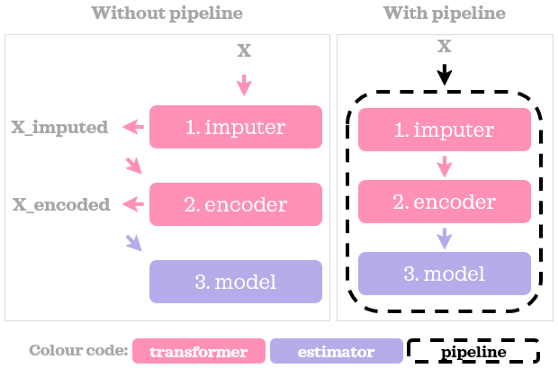

You may have noticed how easy it is to make predictions once we train a pipeline. Pipe. Predict (x) converts the original data and returns the prediction. It’s also easy to see the sequence of steps. Let’s summarize these two methods intuitively
Using pipes not only organizes and simplifies code, but also has many other benefits. Here are some of them:

    Ability to fine tune the pipeline: when building a model, you may need to try different methods to preprocess the data and run the model again to see if the adjustment in the preprocessing step can improve the generalization ability of the model. When optimizing the model, fine tuning not only exists in the super parameters of the model, but also in the implementation of the preprocessing steps. With this in mind, when we have a pipeline object that unifies transformer and estimator, we can fine tune the superparameters of the whole pipeline, including estimator and two transformers using gridsearchcv or randomized searchcv.

    Easier to deploy: all the conversion steps used to prepare the data when training the model can also be applied to the data in the production environment when making predictions. When we train pipes, we train an object that contains a data converter and a model. Once trained, the pipeline object can be used for smoother deployment.

### ColumnTransformer

In the previous example, we interpolated and coded all columns in the same way. However, we often need to apply different transformers to different column groups. For example, we want onehotencoder to be applied only to classified columns, not to numeric columns. This is where columntransformer comes in.

        #Define classification pipeline
        cat_pipe = Pipeline([('imputer', SimpleImputer(strategy='constant',       fill_value='missin,                       ('encoder', OneHotEncoder(handle_unknown='ignore', sparse=False))])

        #Define value pipeline
        num_pipe = Pipeline([('imputer', SimpleImputer(strategy='median')),
                             ('scaler', MinMaxScaler())])

        #Combined classification pipeline and numerical pipeline
        preprocessor = ColumnTransformer(transformers=[('cat', cat_pipe, categorical),
                                                       ('num', num_pipe, numerical)])
                                                       
        #Install transformer and training data estimator on the pipeline
        pipe = Pipeline(steps=[('preprocessor', preprocessor),
                               ('model', LinearRegression())])
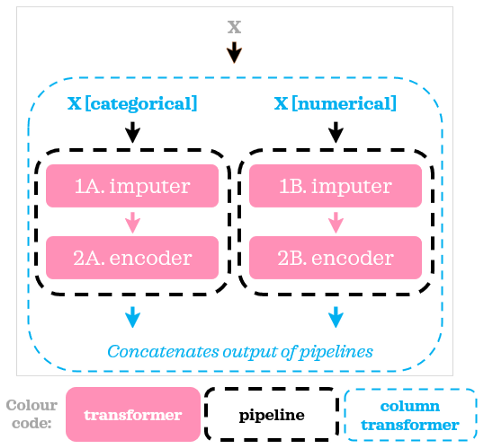

To combine the preprocessing steps specified in columntransformer with the model, we use a pipe externally. The following is its visual representation:


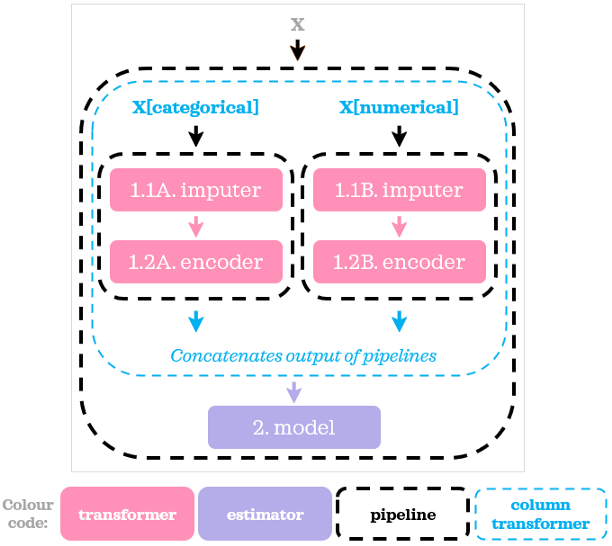

### FeatureUnion 
    #Custom pipe
    class ColumnSelector(BaseEstimator, TransformerMixin):
        """Select only specified columns."""
        def __init__(self, columns):
            self.columns = columns

        def fit(self, X, y=None):
            return self

        def transform(self, X):
            return X[self.columns]

    #Define classification pipeline
    cat_pipe = Pipeline([('selector', ColumnSelector(categorical)),
                         ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
                         ('encoder', OneHotEncoder(handle_unknown='ignore', sparse=False))])

    #Define value pipeline
    num_pipe = Pipeline([('selector', ColumnSelector(numerical)),
                         ('imputer', SimpleImputer(strategy='median')),
                         ('scaler', MinMaxScaler())])

    #Featureunion fitting training data
    preprocessor = FeatureUnion(transformer_list=[('cat', cat_pipe),
                                                  ('num', num_pipe)])
    preprocessor.fit(X_train)

We can think of featureunion as creating copies of the data, converting those copies in parallel, and pasting the results together. The term copy here is more of a conceptual analogy than an actual technology.

At the beginning of each pipe, we add an extra step, where we use a custom converter to select the relevant columns: the column selectors

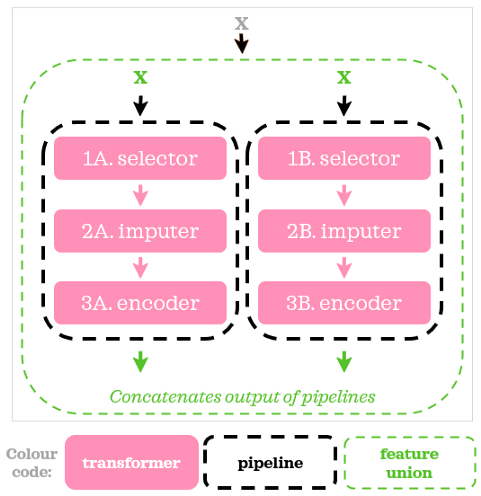

### summary

As you may have noticed, pipeline is a superstar. Columntransformer and featureunion are additional tools for pipes. Columntransformer is more suitable for parallel partitioning, while featureunion allows us to apply multiple converters in parallel on the same input data

https://developpaper.com/pipeline-columntransformer-and-featureunion

## Multiple  preprocess + Features engineer + Features Selections 

# Different Encoders 
encoders = {
    'BackwardDifferenceEncoder': ce.backward_difference.BackwardDifferenceEncoder,
    'BaseNEncoder': ce.basen.BaseNEncoder,
    'BinaryEncoder': ce.binary.BinaryEncoder,
    'CatBoostEncoder': ce.cat_boost.CatBoostEncoder,
    'HashingEncoder': ce.hashing.HashingEncoder,
    'HelmertEncoder': ce.helmert.HelmertEncoder,
    'JamesSteinEncoder': ce.james_stein.JamesSteinEncoder,
    'OneHotEncoder': ce.one_hot.OneHotEncoder,
    'LeaveOneOutEncoder': ce.leave_one_out.LeaveOneOutEncoder,
    'MEstimateEncoder': ce.m_estimate.MEstimateEncoder,
    'OrdinalEncoder': ce.ordinal.OrdinalEncoder,
    'PolynomialEncoder': ce.polynomial.PolynomialEncoder,
    'SumEncoder': ce.sum_coding.SumEncoder,
    'TargetEncoder': ce.target_encoder.TargetEncoder,
    'WOEEncoder': ce.woe.WOEEncoder
}
# Differents Scaler
Scalers={'StandardScaler': StandardScaler,
    'RobustScaler': RobustScaler,
    #'MinMaxScaler': MinMaxScaler,
    #'PowerTransformer': PowerTransformer,
    #'QuantileTransformer': QuantileTransformer,
    'Normalizer': Normalizer,
    'MaxAbsScaler': MaxAbsScaler


encoder_cat = make_pipeline(
            SimpleImputer(strategy='most_frequent',add_indicator=True),
            OneHotEncoder(handle_unknown='ignore'),
            OrdinalEncoder() ,
            ce.cat_boost.CatBoostEncoder(),
            ce.m_estimate.MEstimateEncoder(),
            ce.m_estimate.MEstimateEncoder(),
            ce.target_encoder.TargetEncoder
            SparseInteractions(degree=2)
              )

scaler_num  = make_pipeline( SimpleImputer(strategy='median',add_indicator=True),
                        PolynomialFeatures(degree=2),
                        RobustScaler(),
                        StandardScaler(),
                        MinMaxScaler(),
                        MaxAbsScaler(),
                        QuantileTransformer()
)


#data_preprocessone_hot_encoder = make_column_transformer(
 #   ( fill_missing_then_one_hot_encoder , cat_columns),
  #  ( fill_missing_then_StandardScaler, num_columns),
   # ( 'drop' , drop_colonnes),
    #( 'passthrough' , passthrough_colonnes)
#)


# Pipe OrdinalEncoder 	QuantileTransformer
# Pipe OrdinalEncoder 	PowerTransformer
# Pipe OrdinalEncoder 	MaxAbsScaler
# Pipe OrdinalEncoder 	RobustScaler
# Pipe OrdinalEncoder 	StandardScaler

# Pipe JamesSteinEncoder 	StandardScaler
# Pipe MEstimateEncoder 	StandardScaler
# Pipe TargetEncoder 	PowerTransformer



# Pipe 6:OrdinalEncoderSparse /StandardScalerPolynomial without reduction
# 0.7048661500017998/Public Score : 0.71829
FirstpipepolyOrdiSparseStandarPolywithoutreduction = Pipeline([
        ('scaler+polyfornum+sparseforcat', data_preprocessOrdinalEncoderSparseStandardScalerPolynomial),
        # ('dim_red', SelectKBest(f_regression, k=20)),
        # ('interactions', SparseInteractions(degree=2)),
        ('classifier', XGBR)])
# to try :
SecondpipepolyOrdiSparseStandarPolywithoutreduction = Pipeline([
        ('scaler+polyfornum+sparseforcat', data_preprocessOrdinalEncoderSparseRobustscalerPolynomial),
        # ('dim_red', SelectKBest(f_regression, k=20)),
        # ('interactions', SparseInteractions(degree=2)),
        ('classifier', XGBR)])

# ADD poly num features : 0.6949615269482926/Public Score :0.72104
data_preprocessoneOnehotPolynomialFeatures = make_column_transformer(
    ( fill_missing_then_one_hot_encoder , cat_columns),
    ( fill_missing_then_StandardScalerPolynomialFeatures, num_columns)
)
# Pipe ONE with PolynomialFeatures: 0.6949615269482926 /Public Score :0.72104
pipeONEPoly = Pipeline([
        ('scaler+ONE+poly', data_preprocessoneOnehotPolynomialFeatures),
        ('classifier', XGBR)])


#  Pipe Ordinal encoder + standar/poly for num
#  0.6948632925742044/Public score : 0.72138
pipepolyordi = Pipeline([
        ('scaler+ordi+poly', data_preprocessOrdinalEncoderPolynomialFeatures),
        ('classifier', XGBR)])


# Find Best Pipe
# Steps for K-fold cross-validation

    Split the dataset into K equal partitions (or "folds")
        So if k = 5 and dataset has 150 observations
        Each of the 5 folds would have 30 observations
    Use fold 1 as the testing set and the union of the other folds as the training set
        Testing set = 30 observations (fold 1)
        Training set = 120 observations (folds 2-5)
    Calculate testing accuracy
    Repeat steps 2 and 3 K times, using a different fold as the testing set each time
        We will repeat the process 5 times
        2nd iteration
            fold 2 would be the testing set
            union of fold 1, 3, 4, and 5 would be the training set
        3rd iteration
            fold 3 would be the testing set
            union of fold 1, 2, 4, and 5 would be the training set
        And so on...
    Use the average testing accuracy as the estimate of out-of-sample accuracy

Diagram of 5-fold cross-validation

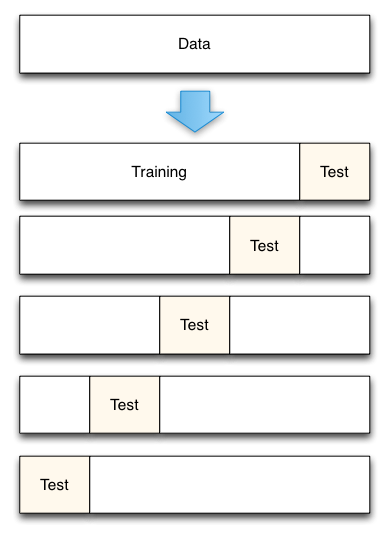






# Comparing cross-validation to train/test split

Advantages of cross-validation:

    More accurate estimate of out-of-sample accuracy
    More "efficient" use of data
        This is because every observation is used for both training and testing

Advantages of train/test split:

    Runs K times faster than K-fold cross-validation
        This is because K-fold cross-validation repeats the train/test split K-times
    Simpler to examine the detailed results of the testing process

# Cross-validation recommendations

    K can be any number, but K=10 is generally recommended
        This has been shown experimentally to produce the best out-of-sample estimate
    For classification problems, stratified sampling is recommended for creating the folds
        Each response class should be represented with equal proportions in each of the K folds
            If dataset has 2 response classes
                Spam/Ham
                20% observation = ham
                Each cross-validation fold should consist of exactly 20% ham
        scikit-learn's cross_val_score function does this by default

# Feature engineering and selection within cross-validation iterations

    Normally, feature engineering and selection occurs before cross-validation
    Instead, perform all feature engineering and selection within each cross-validation iteration
    More reliable estimate of out-of-sample performance since it better mimics the application of the model to out-of-sample data
      


## Step 1: Cross-Validation

In [ ]:
cross_validation_design = KFold(n_splits=3,
                                shuffle=True,
                                random_state=77)

cross_validation_design

# Train Catboost / Xgboost / Lgbm
## Define Baseline XGBR 

In [ ]:
from xgboost import XGBRegressor
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression,f_classif
from sklearn.preprocessing import PolynomialFeatures
# Random HyperParameters
xgb_params = {'n_estimators': 7000,
            'learning_rate': 0.16,
            'subsample': 0.96,
            'colsample_bytree': 0.12,
            'max_depth': 2,
            'booster': 'gbtree', 
            'reg_lambda': 100.1,
            'reg_alpha': 15.9,
            'random_state':40}
XGBR = XGBRegressor(**xgb_params,
                    objective='reg:squarederror', 
                    #early_stopping_rounds=100 ,
                    #tree_method='gpu_hist',
                    #gpu_id=0, 
                    #predictor="gpu_predictor"
                   )

### Cat Booost Encoder + different scaler 

* Pipe CatBoostEncoder 	RobustScaler

* Pipe  CatBoostEncoder 	PowerTransformer 

* Pipe CatBoostEncoder 	QuantileTransformer

* Pipe CatBoostEncoder 	MaxAbsScaler

* Pipe CatBoostEncoder 	StandardScaler

#### 1-1 Pipe CatBoostEncoder 	RobustScaler

In [ ]:
# Cat Features  
CatBoostEncoderSparse = make_pipeline(
            SimpleImputer(strategy='most_frequent',add_indicator=True),
            ce.cat_boost.CatBoostEncoder(),
            SparseInteractions(degree=2)
              )
# Num Features 
PolynomialFeaturesRobustScaler  = make_pipeline( SimpleImputer(strategy='median',add_indicator=True),
                        PolynomialFeatures(degree=2),
                        RobustScaler()
)
CatBoostEncoderSparse_PolynomialFeaturesRobustScaler = make_column_transformer(
    ( CatBoostEncoderSparse , cat_columns),
    ( PolynomialFeaturesRobustScaler, num_columns))
    
# Pipe 6:OrdinalEncoderSparse /StandardScalerPolynomial without reduction
# 0.7048661500017998/Public Score : 0.71829
XGBRCatBoostEncoderRobustScalerwithoutreduction = Pipeline([
        ('preprocess', CatBoostEncoderSparse_PolynomialFeaturesRobustScaler),
        # ('dim_red', SelectKBest(f_regression, k=20)),
        # ('interactions', SparseInteractions(degree=2)),
        ('classifier', XGBR)])  
# Fit the pipeline to the training data
#XGBRCatBoostEncoderRobustScalerwithoutreduction.fit(X_train, y_train)
#preds_valid = XGBRCatBoostEncoderRobustScalerwithoutreduction.predict(X_test)
#print(mean_squared_error(y_test, preds_valid, squared=False))

In [ ]:
#rmsecatrobust =cross_val_score(XGBRCatBoostEncoderRobustScalerwithoutreduction, X, y, cv=cross_validation_design,scoring='neg_root_mean_squared_error').mean()
#print(-rmsecatrobust)

real cross validation score : 0.721260544961198
rmse validation : 0.7225480305907459

#### 1-2 Pipe CatBoostEncoder PowerTransformer 

In [ ]:
# Num Features 
PolynomialFeaturesPowerTransformer  = make_pipeline( SimpleImputer(strategy='median',add_indicator=True),
                        PolynomialFeatures(degree=2),
                        PowerTransformer()
)
CatBoostEncoderSparse_PolynomialFeaturesPowerTransformer = make_column_transformer(
    ( CatBoostEncoderSparse , cat_columns),
    ( PolynomialFeaturesPowerTransformer, num_columns))
    
# Pipe 6:OrdinalEncoderSparse /StandardScalerPolynomial without reduction
# 0.7048661500017998/Public Score : 0.71829
XGBRCatBoostEncoderPowerTransformerwithoutreduction = Pipeline([
        ('preprocess', CatBoostEncoderSparse_PolynomialFeaturesPowerTransformer),
        # ('dim_red', SelectKBest(f_regression, k=20)),
        # ('interactions', SparseInteractions(degree=2)),
        ('classifier', XGBR)])
# Fit the pipeline to the training data
#XGBRCatBoostEncoderPowerTransformerwithoutreduction.fit(X_train, y_train)
#preds_valid = XGBRCatBoostEncoderPowerTransformerwithoutreduction.predict(X_test)
#print(mean_squared_error(y_test, preds_valid, squared=False))

In [ ]:
#rmsecatPower =cross_val_score(XGBRCatBoostEncoderPowerTransformerwithoutreduction, X, y, cv=cross_validation_design,scoring='neg_root_mean_squared_error').mean()
#print(-rmsecatPower)

validation : 0.7225339618603557

#### 1-3 Pipe CatBoostEncoder QuantileTransformer

In [ ]:
# Num Features 
PolynomialFeaturesQuantileTransformer  = make_pipeline( SimpleImputer(strategy='median',add_indicator=True),
                        PolynomialFeatures(degree=2),
                        QuantileTransformer()
)
CatBoostEncoderSparse_PolynomialFeaturesQuantileTransformer = make_column_transformer(
    ( CatBoostEncoderSparse , cat_columns),
    ( PolynomialFeaturesQuantileTransformer, num_columns))
    
# Pipe 6:OrdinalEncoderSparse /StandardScalerPolynomial without reduction
# 0.7048661500017998/Public Score : 0.71829
XGBRCatBoostEncoderQuantileTransformerwithoutreduction = Pipeline([
        ('preprocess', CatBoostEncoderSparse_PolynomialFeaturesQuantileTransformer),
        # ('dim_red', SelectKBest(f_regression, k=20)),
        # ('interactions', SparseInteractions(degree=2)),
        ('classifier', XGBR)])  
#rmsecatQuantileTransformer =cross_val_score(XGBRCatBoostEncoderQuantileTransformerwithoutreduction, X, y, cv=cross_validation_design,scoring='neg_root_mean_squared_error').mean()
#print(-rmsecatQuantileTransformer)
# Fit the pipeline to the training data
#XGBRCatBoostEncoderQuantileTransformerwithoutreduction.fit(X_train, y_train)
#preds_valid = XGBRCatBoostEncoderQuantileTransformerwithoutreduction.predict(X_test)
#print(mean_squared_error(y_test, preds_valid, squared=False))

validation :0.7226686287710591

#### 1-4 Pipe CatBoostEncoder MaxAbsScaler

In [ ]:
# Num Features 
PolynomialFeaturesMaxAbsScaler  = make_pipeline( SimpleImputer(strategy='median',add_indicator=True),
                        PolynomialFeatures(degree=2),
                        MaxAbsScaler()
)
CatBoostEncoderSparse_PolynomialFeaturesMaxAbsScaler = make_column_transformer(
    ( CatBoostEncoderSparse , cat_columns),
    ( PolynomialFeaturesMaxAbsScaler, num_columns))
    
# Pipe 6:OrdinalEncoderSparse /StandardScalerPolynomial without reduction
# 0.7048661500017998/Public Score : 0.71829
XGBRCatBoostEncoderMaxAbsScalerwithoutreduction = Pipeline([
        ('preprocess', CatBoostEncoderSparse_PolynomialFeaturesMaxAbsScaler),
        # ('dim_red', SelectKBest(f_regression, k=20)),
        # ('interactions', SparseInteractions(degree=2)),
        ('classifier', XGBR)])  
#rmsecatMaxAbsScaler =cross_val_score(XGBRCatBoostEncoderMaxAbsScalerwithoutreduction, X, y, cv=cross_validation_design,scoring='neg_root_mean_squared_error').mean()
#print(-rmsecatMaxAbsScaler)
# Fit the pipeline to the training data
#XGBRCatBoostEncoderMaxAbsScalerwithoutreduction.fit(X_train, y_train)
#preds_valid = XGBRCatBoostEncoderMaxAbsScalerwithoutreduction.predict(X_test)
#print(mean_squared_error(y_test, preds_valid, squared=False))

validation rmse : 0.7226933782070919

#### 1-5 Pipe CatBoostEncoder StandardScaler

In [ ]:
# Num Features 
PolynomialFeaturesStandardScaler  = make_pipeline( SimpleImputer(strategy='median',add_indicator=True),
                        PolynomialFeatures(degree=2),
                        StandardScaler()
)
CatBoostEncoderSparse_PolynomialFeaturesStandardScaler = make_column_transformer(
    ( CatBoostEncoderSparse , cat_columns),
    ( PolynomialFeaturesStandardScaler, num_columns))
    
# Pipe 6:OrdinalEncoderSparse /StandardScalerPolynomial without reduction
# 0.7048661500017998/Public Score : 0.71829
XGBRCatBoostEncoderStandardScalerwithoutreduction = Pipeline([
        ('preprocess', CatBoostEncoderSparse_PolynomialFeaturesStandardScaler),
        # ('dim_red', SelectKBest(f_regression, k=20)),
        # ('interactions', SparseInteractions(degree=2)),
        ('classifier', XGBR)])  
#rmsecatStandardScaler =cross_val_score(XGBRCatBoostEncoderStandardScalerwithoutreduction, X, y, cv=cross_validation_design,scoring='neg_root_mean_squared_error').mean()
#print(-rmsecatStandardScaler)
# Fit the pipeline to the training data
#XGBRCatBoostEncoderStandardScalerwithoutreduction.fit(X_train, y_train)
#preds_valid = XGBRCatBoostEncoderStandardScalerwithoutreduction.predict(X_test)
#print(mean_squared_error(y_test, preds_valid, squared=False))

validation : 0.7227284573205145

##### 2-1 Pipe OrdinalEncoder RobustScaler

In [ ]:
# Cat Features  
OrdinalEncoderSparse = make_pipeline(
            SimpleImputer(strategy='most_frequent',add_indicator=True),
            ce.ordinal.OrdinalEncoder(),
            SparseInteractions(degree=2)
              )
# Num Features 
PolynomialFeaturesRobustScaler  = make_pipeline( SimpleImputer(strategy='median',add_indicator=True),
                        PolynomialFeatures(degree=2),
                        RobustScaler()
)
OrdinalEncoderSparse_PolynomialFeaturesRobustScaler = make_column_transformer(
    ( OrdinalEncoderSparse , cat_columns),
    ( PolynomialFeaturesRobustScaler, num_columns))
    
# Pipe 6:OrdinalEncoderSparse /StandardScalerPolynomial without reduction
# 0.7048661500017998/Public Score : 0.71829
XGBROrdinalEncoderRobustScalerwithoutreduction = Pipeline([
        ('preprocess', OrdinalEncoderSparse_PolynomialFeaturesRobustScaler),
        # ('dim_red', SelectKBest(f_regression, k=20)),
        # ('interactions', SparseInteractions(degree=2)),
        ('classifier', XGBR)])  
#rmseOrdinalEncoderStandardScaler =cross_val_score(XGBROrdinalEncoderStandardScalerwithoutreduction, X, y, cv=cross_validation_design,scoring='neg_root_mean_squared_error').mean()
#print(-rmseOrdinalEncoderStandardScaler)
# Fit the pipeline to the training data
#XGBROrdinalEncoderRobustScalerwithoutreduction.fit(X_train, y_train)
#preds_valid = XGBROrdinalEncoderRobustScalerwithoutreduction.predict(X_test)
#print(mean_squared_error(y_test, preds_valid, squared=False))

validation 0.722704357245284

##### 2-2 Pipe OrdinalEncoder PowerTransformer

In [ ]:
# Cat Features  
OrdinalEncoderSparse = make_pipeline(
            SimpleImputer(strategy='most_frequent',add_indicator=True),
            ce.ordinal.OrdinalEncoder(),
            SparseInteractions(degree=2)
              )
# Num Features 
PolynomialFeaturesPowerTransformer  = make_pipeline( SimpleImputer(strategy='median',add_indicator=True),
                        PolynomialFeatures(degree=2),
                        PowerTransformer()
)
OrdinalEncoderSparse_PolynomialFeaturesPowerTransformer = make_column_transformer(
    ( OrdinalEncoderSparse , cat_columns),
    ( PolynomialFeaturesPowerTransformer, num_columns))
    
# Pipe 6:OrdinalEncoderSparse /StandardScalerPolynomial without reduction
# 0.7048661500017998/Public Score : 0.71829
XGBROrdinalEncoderPowerTransformerwithoutreduction = Pipeline([
        ('preprocess', OrdinalEncoderSparse_PolynomialFeaturesPowerTransformer),
        # ('dim_red', SelectKBest(f_regression, k=20)),
        # ('interactions', SparseInteractions(degree=2)),
        ('classifier', XGBR)])  
#rmseOrdinalEncoderPowerTransformer =cross_val_score(XGBROrdinalEncoderPowerTransformerwithoutreduction, X, y, cv=cross_validation_design,scoring='neg_root_mean_squared_error').mean()
#print(-rmseOrdinalEncoderPowerTransformer)
# Fit the pipeline to the training data
#XGBROrdinalEncoderPowerTransformerwithoutreduction.fit(X_train, y_train)
#preds_valid = XGBROrdinalEncoderPowerTransformerwithoutreduction.predict(X_test)
#print(mean_squared_error(y_test, preds_valid, squared=False))

0.7225059484246128

##### 2-3 Pipe OrdinalEncoder QuantileTransformer

In [ ]:
# Cat Features  
OrdinalEncoderSparse = make_pipeline(
            SimpleImputer(strategy='most_frequent',add_indicator=True),
            ce.ordinal.OrdinalEncoder(),
            SparseInteractions(degree=2)
              )
# Num Features 
PolynomialFeaturesQuantileTransformer  = make_pipeline( SimpleImputer(strategy='median',add_indicator=True),
                        PolynomialFeatures(degree=2),
                        QuantileTransformer()
)
OrdinalEncoderSparse_PolynomialFeaturesQuantileTransformer = make_column_transformer(
    ( OrdinalEncoderSparse , cat_columns),
    ( PolynomialFeaturesQuantileTransformer, num_columns))
    
# Pipe 6:OrdinalEncoderSparse /StandardScalerPolynomial without reduction
# 0.7048661500017998/Public Score : 0.71829
XGBROrdinalEncoderQuantileTransformerwithoutreduction = Pipeline([
        ('preprocess', OrdinalEncoderSparse_PolynomialFeaturesQuantileTransformer),
        # ('dim_red', SelectKBest(f_regression, k=20)),
        # ('interactions', SparseInteractions(degree=2)),
        ('classifier', XGBR)])  
#rmseOrdinalEncoderQuantileTransformer =cross_val_score(XGBROrdinalEncoderQuantileTransformerwithoutreduction, X, y, cv=cross_validation_design,scoring='neg_root_mean_squared_error').mean()
#print(-rmseOrdinalEncoderQuantileTransformer)
# Fit the pipeline to the training data
#XGBROrdinalEncoderQuantileTransformerwithoutreduction.fit(X_train, y_train)
#preds_valid = XGBROrdinalEncoderQuantileTransformerwithoutreduction.predict(X_test)
#print(mean_squared_error(y_test, preds_valid, squared=False))

0.7226154043145393

#### 2-4 Pipe OrdinalEncoder MaxAbsScaler

In [ ]:
# Cat Features  
OrdinalEncoderSparse = make_pipeline(
            SimpleImputer(strategy='most_frequent',add_indicator=True),
            ce.ordinal.OrdinalEncoder(),
            SparseInteractions(degree=2)
              )
# Num Features 
PolynomialFeaturesMaxAbsScaler  = make_pipeline( SimpleImputer(strategy='median',add_indicator=True),
                        PolynomialFeatures(degree=2),
                        MaxAbsScaler()
)
OrdinalEncoderSparse_PolynomialFeaturesMaxAbsScaler = make_column_transformer(
    ( OrdinalEncoderSparse , cat_columns),
    ( PolynomialFeaturesMaxAbsScaler, num_columns))
    
# Pipe 6:OrdinalEncoderSparse /StandardScalerPolynomial without reduction
# 0.7048661500017998/Public Score : 0.71829
XGBROrdinalEncoderMaxAbsScalerwithoutreduction = Pipeline([
        ('preprocess', OrdinalEncoderSparse_PolynomialFeaturesMaxAbsScaler),
        # ('dim_red', SelectKBest(f_regression, k=20)),
        # ('interactions', SparseInteractions(degree=2)),
        ('classifier', XGBR)])  
#rmseOrdinalEncoderMaxAbsScaler =cross_val_score(XGBROrdinalEncoderMaxAbsScalerwithoutreduction, X, y, cv=cross_validation_design,scoring='neg_root_mean_squared_error').mean()
#print(-rmseOrdinalEncodertMaxAbsScaler)
# Fit the pipeline to the training data
#XGBROrdinalEncoderMaxAbsScalerwithoutreduction.fit(X_train, y_train)
#preds_valid = XGBROrdinalEncoderMaxAbsScalerwithoutreduction.predict(X_test)
#print(mean_squared_error(y_test, preds_valid, squared=False))

0.7225385174609569

0.7225385174609569

#### 2-5 Pipe OrdinalEncoder  StandardScaler

In [ ]:
# Cat Features  
OrdinalEncoderSparse = make_pipeline(
            SimpleImputer(strategy='most_frequent',add_indicator=True),
            ce.ordinal.OrdinalEncoder(),
            SparseInteractions(degree=2)
              )
# Num Features 
PolynomialFeaturesStandardScaler  = make_pipeline( SimpleImputer(strategy='median',add_indicator=True),
                        PolynomialFeatures(degree=2),
                        StandardScaler()
)
OrdinalEncoderSparse_PolynomialFeaturesStandardScaler = make_column_transformer(
    ( OrdinalEncoderSparse , cat_columns),
    ( PolynomialFeaturesStandardScaler, num_columns))
    
# Pipe 6:OrdinalEncoderSparse /StandardScalerPolynomial without reduction
# 0.7048661500017998/Public Score : 0.71829
XGBROrdinalEncoderStandardScalerwithoutreduction = Pipeline([
        ('preprocess', OrdinalEncoderSparse_PolynomialFeaturesStandardScaler),
        # ('dim_red', SelectKBest(f_regression, k=20)),
        # ('interactions', SparseInteractions(degree=2)),
        ('classifier', XGBR)])  
#rmseOrdinalEncoderStandardScaler =cross_val_score(XGBROrdinalEncoderStandardScalerwithoutreduction, X, y, cv=cross_validation_design,scoring='neg_root_mean_squared_error').mean()
#print(-rmseOrdinalEncoderStandardScaler)
# Fit the pipeline to the training data
#XGBROrdinalEncoderStandardScalerwithoutreduction.fit(X_train, y_train)
#preds_valid = XGBROrdinalEncoderStandardScalerwithoutreduction.predict(X_test)
#print(mean_squared_error(y_test, preds_valid, squared=False))

0.7224449457436771

#### 3 Pipe JamesSteinEncoder 	StandardScaler



In [ ]:
# Cat Features  
JamesSteinEncoderSparse = make_pipeline(
            SimpleImputer(strategy='most_frequent',add_indicator=True),
            ce.james_stein.JamesSteinEncoder(),
            SparseInteractions(degree=2)
              )
# Num Features 
PolynomialFeaturesStandardScaler  = make_pipeline( SimpleImputer(strategy='median',add_indicator=True),
                        PolynomialFeatures(degree=2),
                        StandardScaler()
)
JamesSteinEncoderSparse_PolynomialFeaturesStandardScaler = make_column_transformer(
    ( JamesSteinEncoderSparse , cat_columns),
    ( PolynomialFeaturesStandardScaler, num_columns))
    
# Pipe 6:OrdinalEncoderSparse /StandardScalerPolynomial without reduction
# 0.7048661500017998/Public Score : 0.71829
XGBROJamesSteinEncoderStandardScalerwithoutreduction = Pipeline([
        ('preprocess', OrdinalEncoderSparse_PolynomialFeaturesStandardScaler),
        # ('dim_red', SelectKBest(f_regression, k=20)),
        # ('interactions', SparseInteractions(degree=2)),
        ('classifier', XGBR)])  
#rmseOrdinalEncoderStandardScaler =cross_val_score(XGBROrdinalEncoderStandardScalerwithoutreduction, X, y, cv=cross_validation_design,scoring='neg_root_mean_squared_error').mean()
#print(-rmseOrdinalEncoderStandardScaler)
# Fit the pipeline to the training data
#XGBROJamesSteinEncoderStandardScalerwithoutreduction.fit(X_train, y_train)
#preds_valid = XGBROJamesSteinEncoderStandardScalerwithoutreduction.predict(X_test)
#print(mean_squared_error(y_test, preds_valid, squared=False))

0.7224449457436771


#### 4 Pipe MEstimateEncoder 	StandardScaler



In [ ]:
# Cat Features  
MEstimateEncoderSparse = make_pipeline(
            SimpleImputer(strategy='most_frequent',add_indicator=True),
            ce.m_estimate.MEstimateEncoder(),
            SparseInteractions(degree=2)
              )
# Num Features 
PolynomialFeaturesStandardScaler  = make_pipeline( SimpleImputer(strategy='median',add_indicator=True),
                        PolynomialFeatures(degree=2),
                        StandardScaler()
)
MEstimateEncoderSparse_PolynomialFeaturesStandardScaler = make_column_transformer(
    ( MEstimateEncoderSparse , cat_columns),
    ( PolynomialFeaturesStandardScaler, num_columns))
    
# Pipe 6:OrdinalEncoderSparse /StandardScalerPolynomial without reduction
# 0.7048661500017998/Public Score : 0.71829
XGBRMEstimateEncoderStandardScalerwithoutreduction = Pipeline([
        ('preprocess', MEstimateEncoderSparse_PolynomialFeaturesStandardScaler),
        # ('dim_red', SelectKBest(f_regression, k=20)),
        # ('interactions', SparseInteractions(degree=2)),
        ('classifier', XGBR)])  
#rmseOrdinalEncoderStandardScaler =cross_val_score(XGBROrdinalEncoderStandardScalerwithoutreduction, X, y, cv=cross_validation_design,scoring='neg_root_mean_squared_error').mean()
#print(-rmseOrdinalEncoderStandardScaler)
# Fit the pipeline to the training data
#XGBRMEstimateEncoderStandardScalerwithoutreduction.fit(X_train, y_train)
#preds_valid = XGBRMEstimateEncoderStandardScalerwithoutreduction.predict(X_test)
#print(mean_squared_error(y_test, preds_valid, squared=False))

0.7227656683333193


#### 5 Pipe TargetEncoder 	PowerTransformer

In [ ]:
# Cat Features  
TargetEncoderSparse = make_pipeline(
            SimpleImputer(strategy='most_frequent',add_indicator=True),
            ce.target_encoder.TargetEncoder(),
            SparseInteractions(degree=2)
              )
# Num Features 
PolynomialFeaturesPowerTransformer  = make_pipeline( SimpleImputer(strategy='median',add_indicator=True),
                        PolynomialFeatures(degree=2),
                        PowerTransformer()
)
TargetEncoderSparse_PolynomialFeaturesPowerTransformer = make_column_transformer(
    ( TargetEncoderSparse , cat_columns),
    ( PolynomialFeaturesPowerTransformer, num_columns))
    
# Pipe 6:OrdinalEncoderSparse /StandardScalerPolynomial without reduction
# 0.7048661500017998/Public Score : 0.71829
XGBRTargetEncoderPowerTransformerwithoutreduction = Pipeline([
        ('preprocess', TargetEncoderSparse_PolynomialFeaturesPowerTransformer),
        # ('dim_red', SelectKBest(f_regression, k=20)),
        # ('interactions', SparseInteractions(degree=2)),
        ('classifier', XGBR)])  
#rmseOrdinalEncoderStandardScaler =cross_val_score(XGBROrdinalEncoderStandardScalerwithoutreduction, X, y, cv=cross_validation_design,scoring='neg_root_mean_squared_error').mean()
#print(-rmseOrdinalEncoderStandardScaler)
# Fit the pipeline to the training data
#XGBRTargetEncoderPowerTransformerwithoutreduction.fit(X_train, y_train)
#preds_valid = XGBRTargetEncoderPowerTransformerwithoutreduction.predict(X_test)
#print(mean_squared_error(y_test, preds_valid, squared=False))

0.722668044490392

#### pipe 6 CatBoostEncoder RobustScaler without features engineer

In [ ]:

# Cat Features  
CatBoostEncoder1 = make_pipeline(
            SimpleImputer(strategy='most_frequent',add_indicator=True),
            ce.cat_boost.CatBoostEncoder(),
            #SparseInteractions(degree=2)
              )
# Num Features 
RobustScaler1  = make_pipeline( SimpleImputer(strategy='median',add_indicator=True),
                       # PolynomialFeatures(degree=2),
                        RobustScaler()
)
CatBoostEncoder_RobustScaler = make_column_transformer(
    ( CatBoostEncoder1 , cat_columns),
    ( RobustScaler1, num_columns))
    
# Pipe 6:OrdinalEncoderSparse /StandardScalerPolynomial without reduction
# 0.7048661500017998/Public Score : 0.71829
XGBRCatBoostEncoderRobustScalerwithoutfeatures = Pipeline([
        ('preprocess', CatBoostEncoder_RobustScaler),
        # ('dim_red', SelectKBest(f_regression, k=20)),
        # ('interactions', SparseInteractions(degree=2)),
        ('classifier', XGBR)])  
# Fit the pipeline to the training data
#XGBRCatBoostEncoderRobustScalerwithoutfeatures.fit(X_train, y_train)
#preds_valid = XGBRCatBoostEncoderRobustScalerwithoutfeatures.predict(X_test)
#print(mean_squared_error(y_test, preds_valid, squared=False))

0.7196597118650423

#### pipe 7 CatBoostEncoder PowerTransformer without features engineer

In [ ]:
# Num Features 
PowerTransformer2  = make_pipeline( SimpleImputer(strategy='median',add_indicator=True),
                        #PolynomialFeatures(degree=2),
                        PowerTransformer()
)
CatBoostEncoder_PowerTransformer = make_column_transformer(
    ( CatBoostEncoder1 , cat_columns),
    ( PowerTransformer2, num_columns))
    
# Pipe 6:OrdinalEncoderSparse /StandardScalerPolynomial without reduction
# 0.7048661500017998/Public Score : 0.71829
XGBRCatBoostEncoderPowerTransformerwithoutfeatures  = Pipeline([
        ('preprocess', CatBoostEncoder_PowerTransformer),
        # ('dim_red', SelectKBest(f_regression, k=20)),
        # ('interactions', SparseInteractions(degree=2)),
        ('classifier', XGBR)])
# Fit the pipeline to the training data
#XGBRCatBoostEncoderPowerTransformerwithoutfeatures.fit(X_train, y_train)
#preds_valid = XGBRCatBoostEncoderPowerTransformerwithoutfeatures.predict(X_test)
#print(mean_squared_error(y_test, preds_valid, squared=False))

0.719404922322341

####  Pipe 9 OrdinalEncoder MaxAbsScaler without features engineer 

In [ ]:
# Cat Features  
OrdinalEncoder1 = make_pipeline(
            SimpleImputer(strategy='most_frequent',add_indicator=True),
            ce.ordinal.OrdinalEncoder(),
            #SparseInteractions(degree=2)
              )
# Num Features 
MaxAbsScaler1  = make_pipeline( SimpleImputer(strategy='median',add_indicator=True),
                        #PolynomialFeatures(degree=2),
                        MaxAbsScaler()
)
OrdinalEncoder_MaxAbsScaler = make_column_transformer(
    ( OrdinalEncoder1 , cat_columns),
    ( MaxAbsScaler1, num_columns))
    
# Pipe 6:OrdinalEncoderSparse /StandardScalerPolynomial without reduction
# 0.7048661500017998/Public Score : 0.71829
XGBROrdinalEncoderMaxAbsScalerwithoutfeatures= Pipeline([
        ('preprocess', OrdinalEncoder_MaxAbsScaler),
        # ('dim_red', SelectKBest(f_regression, k=20)),
        # ('interactions', SparseInteractions(degree=2)),
        ('classifier', XGBR)])  
#rmseOrdinalEncoderMaxAbsScaler =cross_val_score(XGBROrdinalEncoderMaxAbsScalerwithoutreduction, X, y, cv=cross_validation_design,scoring='neg_root_mean_squared_error').mean()
#print(-rmseOrdinalEncodertMaxAbsScaler)
# Fit the pipeline to the training data
#XGBROrdinalEncoderMaxAbsScalerwithoutfeatures.fit(X_train, y_train)
#preds_valid = XGBROrdinalEncoderMaxAbsScalerwithoutfeatures.predict(X_test)
#print(mean_squared_error(y_test, preds_valid, squared=False))

0.7193935161595488

####  Pipe 9 OrdinalEncoder QuantileTransformer without features engineer 

In [ ]:
# Cat Features  
OrdinalEncoder1 = make_pipeline(
            SimpleImputer(strategy='most_frequent',add_indicator=True),
            ce.ordinal.OrdinalEncoder(),
            #SparseInteractions(degree=2)
              )
# Num Features 
QuantileTransformer1  = make_pipeline( SimpleImputer(strategy='median',add_indicator=True),
                        #PolynomialFeatures(degree=2),
                        QuantileTransformer()
)
OrdinalEncoder_QuantileTransformer = make_column_transformer(
    ( OrdinalEncoder1 , cat_columns),
    ( QuantileTransformer1, num_columns))
    
# Pipe 6:OrdinalEncoderSparse /StandardScalerPolynomial without reduction
# 0.7048661500017998/Public Score : 0.71829
XGBROrdinalEncoderQuantileTransformerwithoutfeatures= Pipeline([
        ('preprocess', OrdinalEncoder_QuantileTransformer),
        # ('dim_red', SelectKBest(f_regression, k=20)),
        # ('interactions', SparseInteractions(degree=2)),
        ('classifier', XGBR)])  
#rmseOrdinalEncoderMaxAbsScaler =cross_val_score(XGBROrdinalEncoderMaxAbsScalerwithoutreduction, X, y, cv=cross_validation_design,scoring='neg_root_mean_squared_error').mean()
#print(-rmseOrdinalEncodertMaxAbsScaler)
# Fit the pipeline to the training data
#XGBROrdinalEncoderQuantileTransformerwithoutfeatures.fit(X_train, y_train)
#preds_valid = XGBROrdinalEncoderQuantileTransformerwithoutfeatures.predict(X_test)
#print(mean_squared_error(y_test, preds_valid, squared=False))

0.7192081080938193


# PCA

0.7476006596341427

0.7206232204049583


# Select Best Model and retrain on all data 

#  Submit to the competition
We'll begin by using the trained model to generate predictions, which we'll save to a CSV file.


In [ ]:
pipepolypca.fit(X, y)
preds_valid = pipepolypca.predict(X_test)
print(mean_squared_error(y_test, preds_valid, squared=False))
test_final= test.drop(['id'], axis=1)
# Use the model to generate predictions
predictions = pipepolypca.predict(test_final)
# Save the predictions to a CSV file
output = pd.DataFrame({'Id': test.id,'target': predictions})
output.to_csv('6submissionpipepolypca.csv', index=False)

# Summuary : 

Smote : 

https://www.researchgate.net/publication/257364616_SMOTE_for_Regression

https://towardsdatascience.com/struggling-with-data-imbalance-semi-supervised-self-supervised-learning-help-4de8b8f23490

https://www.kdnuggets.com/2020/01/5-most-useful-techniques-handle-imbalanced-datasets.html

https://github.com/nickkunz/smogn/blob/master/examples/smogn_example_3_adv.ipynb

https://github.com/nickkunz/smogn

https://www.kaggle.com/aleksandradeis/regression-addressing-extreme-rare-cases

https://www.kaggle.com/aleksandradeis/regression-addressing-extreme-rare-cases